In [1]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# stop fuzzy charts
%config InlineBackend.figure_format = "retina"

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

Data for this projet was sourced from CSO: https://www.cso.ie/en/statistics/

- The fertiziler data was collected https://data.cso.ie/table/AJM05 ranging from Jan 1980 - Feb 2022

I wanted to look at what makes up fertilizer to see prices for materials also went up. 
Data for potassium chloride was collected from 
https://www.indexmundi.com/commodities/?commodity=potassium-chloride&months=240&currency=eur


fertiliser consumption in the EU
https://ec.europa.eu/eurostat/databrowser/view/AEI_FM_USEFERT__custom_286880/bookmark/table?lang=en&bookmarkId=05eb8b63-b750-4adf-88ca-f6232e9cbbb9

In [5]:
#import datasets
df_fertiliser = pd.read_csv("../data/fertiliser_price.csv")   #fertilizer
df_milk = pd.read_csv("../data/milk_price.csv")               #fertilizer
#what makes up the fertisiler
df_potassium = pd.read_csv("../data/potassium_chloride_price.csv")   #potassium_chloride_price
df_phosphate = pd.read_csv("../data/rock_phosphate_price.csv")   #phosphate_price
df_urea = pd.read_csv("../data/urea_price.csv")   #phosphate_price
#fertiliser_consumption_eu
df_consum_eu = pd.read_csv("../data/fertiliser_consumption_eu.csv")   #fertilizer

#tweets
df_tweets= pd.read_csv("../data/farmtweets.csv")   #farm tweets

In [6]:
df_potassium

,Month,Price,Change
0,Mar 2002,128.46,-
1,Apr 2002,127.01,-1.13%
2,May 2002,122.69,-3.40%
3,Jun 2002,117.79,-3.99%
4,Jul 2002,113.40,-3.73%
...,...,...,...
236,Nov 2021,193.38,1.53%
237,Dec 2021,195.61,1.15%
238,Jan 2022,195.41,-0.10%
239,Feb 2022,345.41,76.76%


In [7]:
# check the dtypes
df_fertiliser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Statistic           12144 non-null  object
 1   Month               12144 non-null  object
 2   Type of Fertiliser  12144 non-null  object
 3   UNIT                12144 non-null  object
 4   VALUE               6979 non-null   object
dtypes: object(5)
memory usage: 474.5+ KB


In [8]:
#lowercase case the column names
df_fertiliser = df_fertiliser.rename(str.lower, axis='columns')
df_fertiliser = df_fertiliser.rename(columns = {"month": "date", "type of fertiliser":"fertiliser_type"})

In [9]:
df_fertiliser

,statistic,date,fertiliser_type,unit,value
0,Fertiliser Price,1980M01,Calcium Ammonium Nitrate (27.5% N),Euro per Tonne,121
1,Fertiliser Price,1980M01,Urea (46% N),Euro per Tonne,144
2,Fertiliser Price,1980M01,Granular Superphosphate (16% P),Euro per Tonne,160
3,Fertiliser Price,1980M01,Muriate of Potash (50% K),Euro per Tonne,109
4,Fertiliser Price,1980M01,Compound 0-10-20,Euro per Tonne,130
...,...,...,...,...,...
12139,Fertiliser Price,2022M02,Compound 15-3-20,Euro per Tonne,770
12140,Fertiliser Price,2022M02,Compound 24-2.2-10,Euro per Tonne,.
12141,Fertiliser Price,2022M02,Compound 24-2.2-4.5,Euro per Tonne,748
12142,Fertiliser Price,2022M02,Compound 19-0-15,Euro per Tonne,750


In [10]:
# check all the type of fertiliser
df_fertiliser['fertiliser_type'].unique()

array(['Calcium Ammonium Nitrate (27.5% N)', 'Urea (46% N)',
       'Granular Superphosphate (16% P)', 'Muriate of Potash (50% K)',
       'Compound 0-10-20', 'Compound 0-7-30', 'Compound 7-6-17',
       'Compound 10-10-20', 'Compound 14-7-14', 'Compound 18-6-12',
       'Compound 24-2.5-10', 'Compound 27-2.5-5',
       'Sulphate of Potash (42% K)', 'Compound 8-5-18',
       'Compound 20-4-10', 'Sulphate of Ammonia (21%)',
       'Ammonium Sulphate Nitrate (26%)', 'Compound 10-5-25',
       'Compound 13-6-20', 'Compound 15-3-20', 'Compound 24-2.2-10',
       'Compound 24-2.2-4.5', 'Compound 19-0-15', 'Compound 25-4-0'],
      dtype=object)

In [11]:
# make type categorical
df_fertiliser['fertiliser_type'] = df_fertiliser['fertiliser_type'].astype("category")

In [12]:
#removing the M and replacing with the -
df_fertiliser['date'] = df_fertiliser['date'].str.replace("M", "-")

In [13]:
# date format
df_fertiliser['date'] = pd.to_datetime(df_fertiliser['date'], format='%Y-%m')

In [14]:
df_fertiliser['month_year'] = pd.to_datetime(df_fertiliser['date']).dt.to_period('M')
df_fertiliser['month'] = pd.DatetimeIndex(df_fertiliser['date']).month
df_fertiliser['year'] = pd.DatetimeIndex(df_fertiliser['date']).year

In [15]:
# check the dtypes
df_fertiliser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   statistic        12144 non-null  object        
 1   date             12144 non-null  datetime64[ns]
 2   fertiliser_type  12144 non-null  category      
 3   unit             12144 non-null  object        
 4   value            6979 non-null   object        
 5   month_year       12144 non-null  period[M]     
 6   month            12144 non-null  int64         
 7   year             12144 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2), object(3), period[M](1)
memory usage: 676.8+ KB


There is missing data on the VALUE column

One of the values was showing '.' instead of a number and it was making it diffcult to convert into a numeric value going to change it to NA for now

In [16]:
df_fertiliser.value = df_fertiliser.value.replace('.', np.nan)

In [17]:
df_fertiliser.value == "."

0        False
1        False
2        False
3        False
4        False
         ...  
12139    False
12140    False
12141    False
12142    False
12143    False
Name: value, Length: 12144, dtype: bool

In [18]:
# convert to a numeric value
df_fertiliser['value'] = pd.to_numeric(df_fertiliser['value'])

### Descriptive statistics

In [19]:
# summary statistics
df_fertiliser.describe()

,value,month,year
count,6557.000000,12144.000000,12144.000000
mean,288.982767,6.480237,2000.584980
std,114.851093,3.459763,12.172429
min,109.000000,1.000000,1980.000000
25%,196.000000,3.000000,1990.000000
50%,245.000000,6.000000,2001.000000
75%,378.000000,9.000000,2011.000000
max,939.000000,12.000000,2022.000000


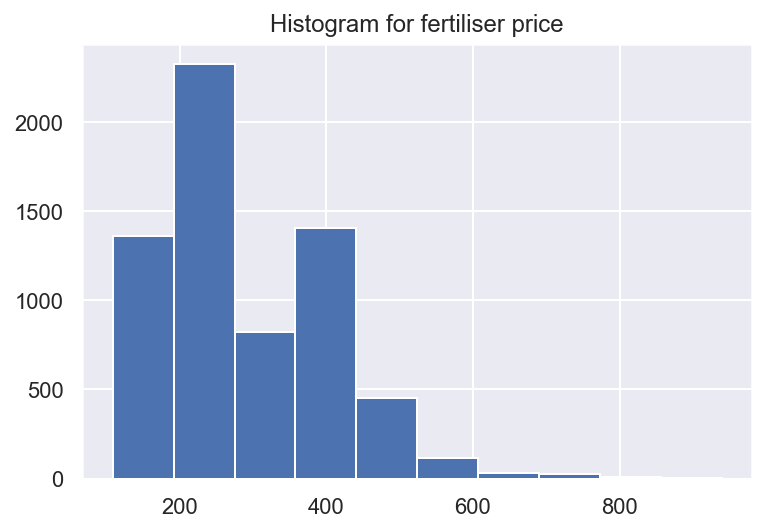

In [20]:
x = df_fertiliser['value'].dropna()
x
plt.hist(x);

plt.title("Histogram for fertiliser price");

plt.show();

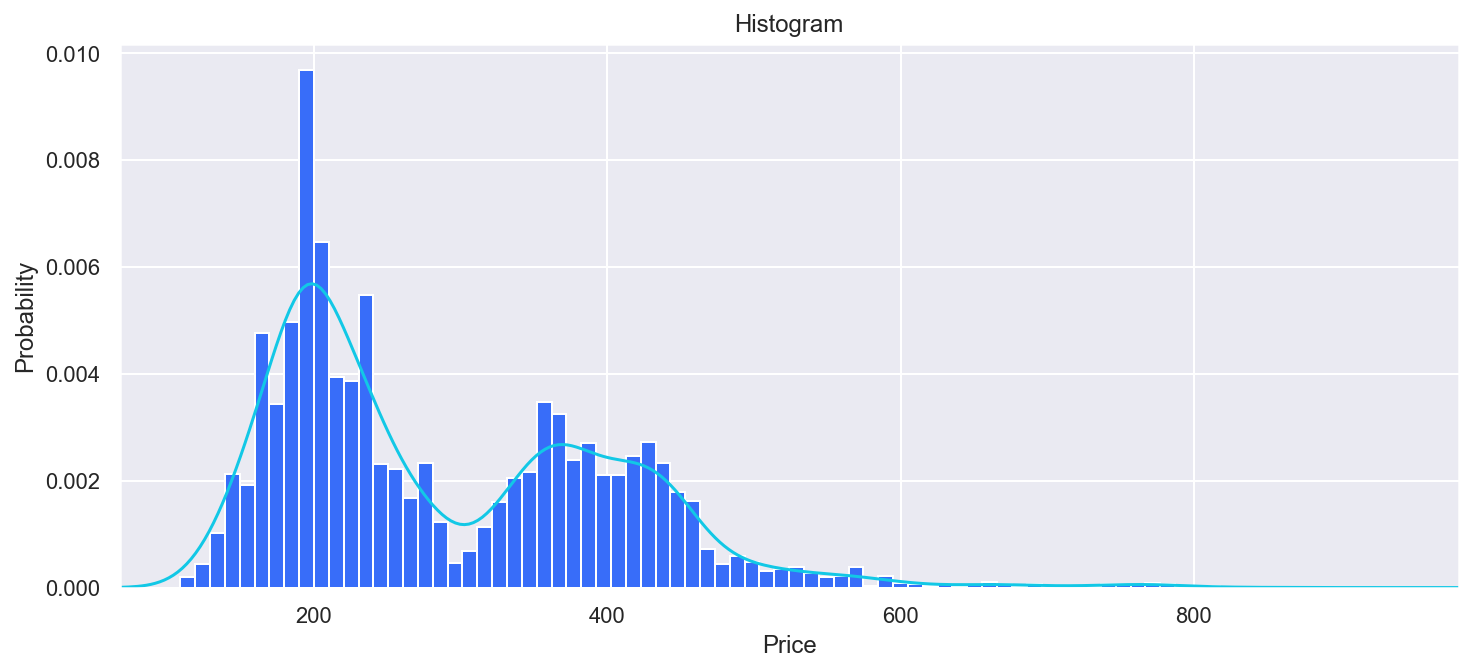

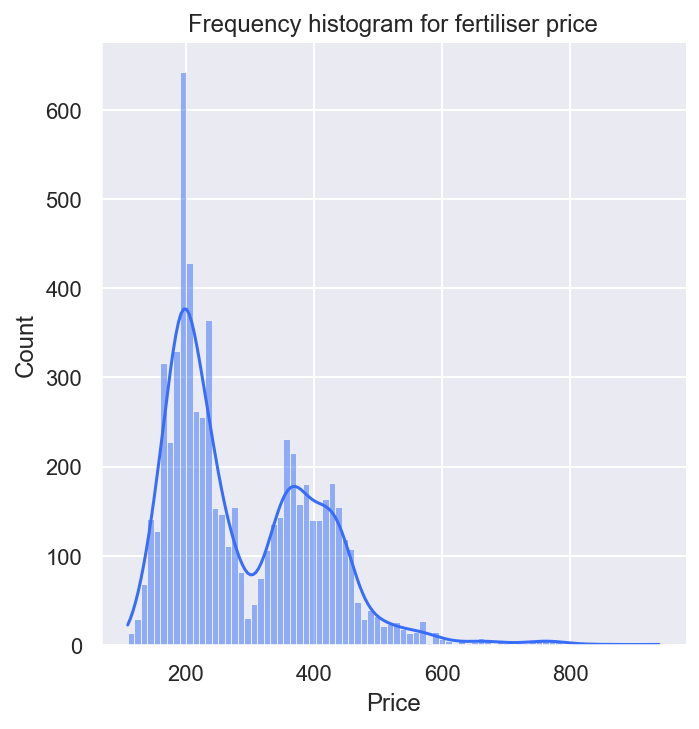

In [21]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

import scipy.stats as st

plt.hist(x, density=True, bins=82, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), label="")
#plt.legend(loc="upper right")
plt.ylabel("Probability")
plt.xlabel("Price")
plt.title("Histogram");


import seaborn as sns
sns.displot(x, bins=82, kde=True);
plt.title("Frequency histogram for fertiliser price");
plt.ylabel("Count");
plt.xlabel("Price");
plt.show();

Data is right skewed

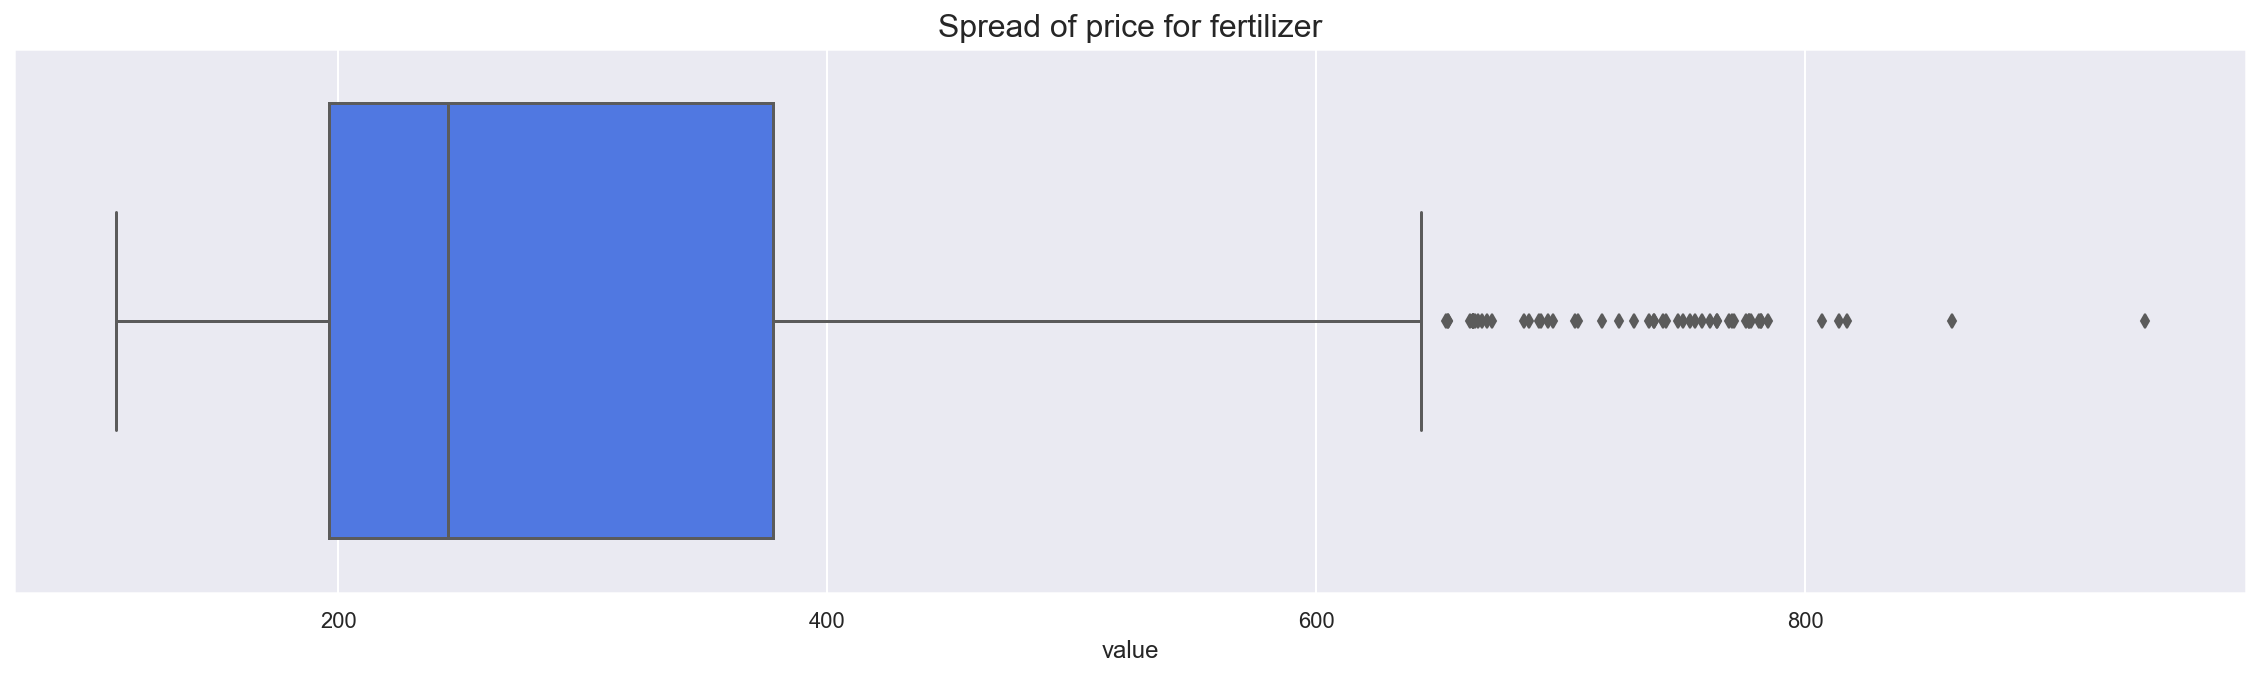

In [22]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(20, 5));  

# Type of fertilizer and Value   
sns.boxplot(x);

plt.title("Spread of price for fertilizer", fontsize=16);
plt.show();

In [23]:
#dropping na values 6557 rows × 8 columns
df_fertiliser_nadrop = df_fertiliser.dropna()
pop_mean = df_fertiliser_nadrop['value'].mean()
pop_mode = df_fertiliser_nadrop['value'].mode()
pop_var = df_fertiliser_nadrop['value'].var()
pop_std = df_fertiliser_nadrop['value'].std()
print("Population mean:", pop_mean)
print("Population mode:", pop_mode)
print("Population variance:", pop_var)
print("Population standard deviation:", pop_std)


Population mean: 288.9827665090743
Population mode: 0    194.0
dtype: float64
Population variance: 13190.77349795869
Population standard deviation: 114.8510927155623


### Inferential statistics 

use inferential statistics to gain insights on possible population values. 

helpful - https://www.youtube.com/watch?v=I10q6fjPxJ0

In [24]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

In [25]:
#dropping na values 6557 rows × 8 columns
df_fertiliser_nadrop = df_fertiliser.dropna()
# taking a random sample 10%
#df_sample = df_fertiliser_nadrop.sample(n=655)
#df_sample
df_sample = df_fertiliser_nadrop.groupby(['value','fertiliser_type'], group_keys=False).apply(lambda x: x.sample(1))
df_sample

,statistic,date,fertiliser_type,unit,value,month_year,month,year
3,Fertiliser Price,1980-01-01,Muriate of Potash (50% K),Euro per Tonne,109.0,1980-01,1,1980
99,Fertiliser Price,1980-05-01,Muriate of Potash (50% K),Euro per Tonne,114.0,1980-05,5,1980
171,Fertiliser Price,1980-08-01,Muriate of Potash (50% K),Euro per Tonne,115.0,1980-08,8,1980
219,Fertiliser Price,1980-10-01,Muriate of Potash (50% K),Euro per Tonne,117.0,1980-10,10,1980
2016,Fertiliser Price,1987-01-01,Calcium Ammonium Nitrate (27.5% N),Euro per Tonne,118.0,1987-01,1,1987
...,...,...,...,...,...,...,...,...
12131,Fertiliser Price,2022-02-01,Compound 27-2.5-5,Euro per Tonne,807.0,2022-02,2,2022
12130,Fertiliser Price,2022-02-01,Compound 24-2.5-10,Euro per Tonne,814.0,2022-02,2,2022
12126,Fertiliser Price,2022-02-01,Compound 7-6-17,Euro per Tonne,817.0,2022-02,2,2022
12097,Fertiliser Price,2022-01-01,Urea (46% N),Euro per Tonne,860.0,2022-01,1,2022


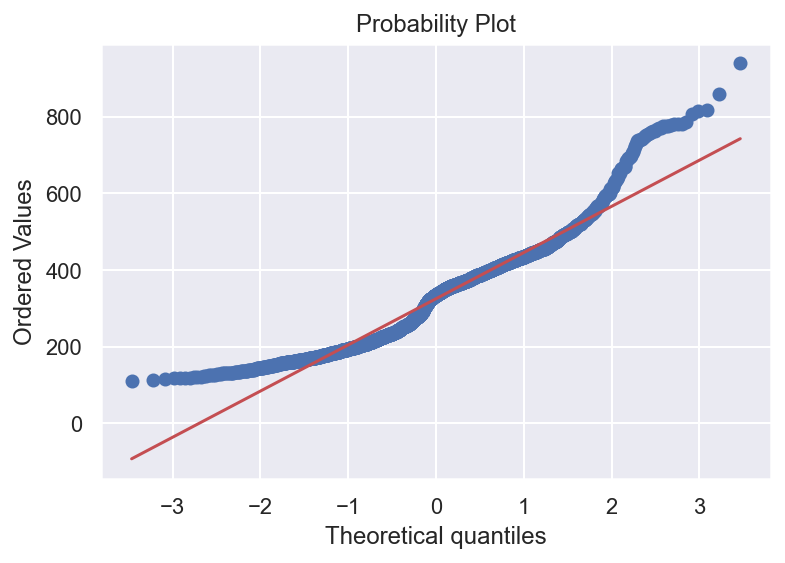

<Figure size 432x288 with 0 Axes>

In [26]:
#Normality plot. Our variable is "value"
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size


stats.probplot(df_sample.value, plot=plt);
plt.figure();
plt.show();

In [27]:
sample_mean = df_sample['value'].mean()
sample_mode = df_sample['value'].mode()
sample_var = df_sample['value'].var()
sample_std = df_sample['value'].std()

print("Sample mean:", sample_mean)
print("Sample mode:", sample_mode)
print("Sample variance:", sample_var)
print("Sample standard deviation:", sample_std)

Sample mean: 324.846740373618
Sample mode: 0    369.0
dtype: float64
Sample variance: 15329.83081221593
Sample standard deviation: 123.81369396078905


#### One Sample t-Test in Python

1. Form hypothesis - Want to know if the mean price of fertiliser is equal to 288. 
    - Null Hypothesis (H₀) = 288
    - H₁ != 288

2. Collect a random sample.

3. Calculate the T-test for the mean of ONE group of scores.
    - This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.
    
    
| H₀ | H₁ | Test |
| --- | --- | --- |
| There is no difference in the mean | There is a difference in the means | One sample T-test for Mean |

In [28]:
import scipy.stats as stats

#perform one sample t-test
stats.ttest_1samp(df_sample['value'], 288)

Ttest_1sampResult(statistic=15.241564162524613, pvalue=2.5226457741121897e-50)

In [29]:
ttest,p_value = stats.ttest_1samp(df_sample['value'], 288)
print("p value:%.8f" % p_value)
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis") 

p value:0.00000000
Reject null hypothesis


#### Anova of fertiliser

1. Form hypothesis - is there a difference in price between fertiliser type? 
    - Null Hypothesis (H₀) - there is no difference
    - H₁ - there is a difference 

2. Collect a random sample.

3. Calculate the ANOVA (use anova when there are more then 2 categories).
   
    
    
    | H₀ | H₁ | Test |
| --- | --- | --- |
| There is no difference in the mean | There is a difference in the means | ANOVA |

In [30]:
df_sample['fertiliser_type'].value_counts()

Urea (46% N)                          201
Compound 10-10-20                     200
Calcium Ammonium Nitrate (27.5% N)    187
Compound 14-7-14                      186
Compound 18-6-12                      186
Compound 27-2.5-5                     186
Compound 24-2.5-10                    186
Compound 0-10-20                      175
Muriate of Potash (50% K)             175
Compound 0-7-30                       165
Granular Superphosphate (16% P)       139
Compound 7-6-17                       109
Compound 20-4-10                       76
Compound 24-2.2-4.5                    66
Compound 19-0-15                       59
Compound 25-4-0                        49
Compound 10-5-25                       49
Compound 8-5-18                        46
Compound 15-3-20                       41
Sulphate of Ammonia (21%)              39
Compound 13-6-20                       36
Sulphate of Potash (42% K)             29
Ammonium Sulphate Nitrate (26%)        29
Compound 24-2.2-10                

In [31]:
#Shapiro wilk test
stats.shapiro(df_sample.value[df_sample.fertiliser_type == "Urea (46% N)"])

ShapiroResult(statistic=0.8804351091384888, pvalue=1.5567542047123517e-11)

In [32]:
#Shapiro wilk test
stats.shapiro(df_sample.value[df_sample.fertiliser_type == "Compound 10-10-20"])

ShapiroResult(statistic=0.9193078875541687, pvalue=5.180907258761636e-09)

In [33]:
#Shapiro wilk test
stats.shapiro(df_sample.value[df_sample.fertiliser_type == "Calcium Ammonium Nitrate (27.5% N)"])

ShapiroResult(statistic=0.902866780757904, pvalue=1.0081726564692417e-09)

In [34]:
#Shapiro wilk test
stats.shapiro(df_sample.value[df_sample.fertiliser_type == "Compound 14-7-14"])

ShapiroResult(statistic=0.9048146605491638, pvalue=1.4448484630946723e-09)

In [35]:
#Shapiro wilk test
stats.shapiro(df_sample.value[df_sample.fertiliser_type == "Compound 18-6-12"])

ShapiroResult(statistic=0.9180778861045837, pvalue=1.1110415698567522e-08)

In [36]:
urea = df_sample.value[df_sample.fertiliser_type == "Urea (46% N)"]
compound_10_10_20 = df_sample.value[df_sample.fertiliser_type == "Compound 10-10-20"]
cal_ammo_nitr = df_sample.value[df_sample.fertiliser_type == "Calcium Ammonium Nitrate (27.5% N)"]
compound_14_7_14 = df_sample.value[df_sample.fertiliser_type == "Compound 14-7-14"]
compound_18_6_12 = df_sample.value[df_sample.fertiliser_type == "Compound 18-6-12"]

In [37]:
sd1 = urea.std()
sd2 = compound_10_10_20.std()
sd3 = cal_ammo_nitr.std()
sd4 = compound_14_7_14.std()
sd5 = compound_18_6_12.std()

print("Urea (46% N) std:" ,sd1)
print("compound 10-10-20 std:" ,sd2)
print("Calcium Ammonium Nitrate (27.5% N) std:" ,sd3)
print("Compound 14-7-14 std:" ,sd4)
print("Compound 18-6-12 std:" ,sd5)

Urea (46% N) std: 117.74792600976882
compound 10-10-20 std: 123.00729683793917
Calcium Ammonium Nitrate (27.5% N) std: 90.10809607469862
Compound 14-7-14 std: 124.47668451128673
Compound 18-6-12 std: 111.02972483335607


In [38]:
#Homogeinity of variance: Levene's test

from scipy.stats import levene

In [39]:
levene, p_value = levene(urea, compound_10_10_20, cal_ammo_nitr,compound_14_7_14, compound_18_6_12, center = 'mean')
#pvalue is less then alpha
#they are equal
if p_value <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis") 

Reject null hypothesis


In [40]:
#ONE-WAY ANOVA
model = ols('value~fertiliser_type', data = df_sample).fit()
aov = sm.stats.anova_lm(model, type=23)
print(aov)
print(model.f_pvalue)
#df is degrees of freedom
# types = 24
# n - 1 = 23

                     df        sum_sq        mean_sq          F        PR(>F)
fertiliser_type    23.0  5.804322e+06  252361.810451  19.071791  6.588525e-72
Residual         2599.0  3.439049e+07   13232.202674        NaN           NaN
6.58852464302429e-72


### Analysing the Data

In [41]:
#filtering to a specific type
df_com15 = df_fertiliser[df_fertiliser['fertiliser_type']=='Compound 15-3-20']
df_com15

,statistic,date,fertiliser_type,unit,value,month_year,month,year
19,Fertiliser Price,1980-01-01,Compound 15-3-20,Euro per Tonne,NaN,1980-01,1,1980
43,Fertiliser Price,1980-02-01,Compound 15-3-20,Euro per Tonne,NaN,1980-02,2,1980
67,Fertiliser Price,1980-03-01,Compound 15-3-20,Euro per Tonne,NaN,1980-03,3,1980
91,Fertiliser Price,1980-04-01,Compound 15-3-20,Euro per Tonne,NaN,1980-04,4,1980
115,Fertiliser Price,1980-05-01,Compound 15-3-20,Euro per Tonne,NaN,1980-05,5,1980
...,...,...,...,...,...,...,...,...
12043,Fertiliser Price,2021-10-01,Compound 15-3-20,Euro per Tonne,NaN,2021-10,10,2021
12067,Fertiliser Price,2021-11-01,Compound 15-3-20,Euro per Tonne,NaN,2021-11,11,2021
12091,Fertiliser Price,2021-12-01,Compound 15-3-20,Euro per Tonne,NaN,2021-12,12,2021
12115,Fertiliser Price,2022-01-01,Compound 15-3-20,Euro per Tonne,764.0,2022-01,1,2022


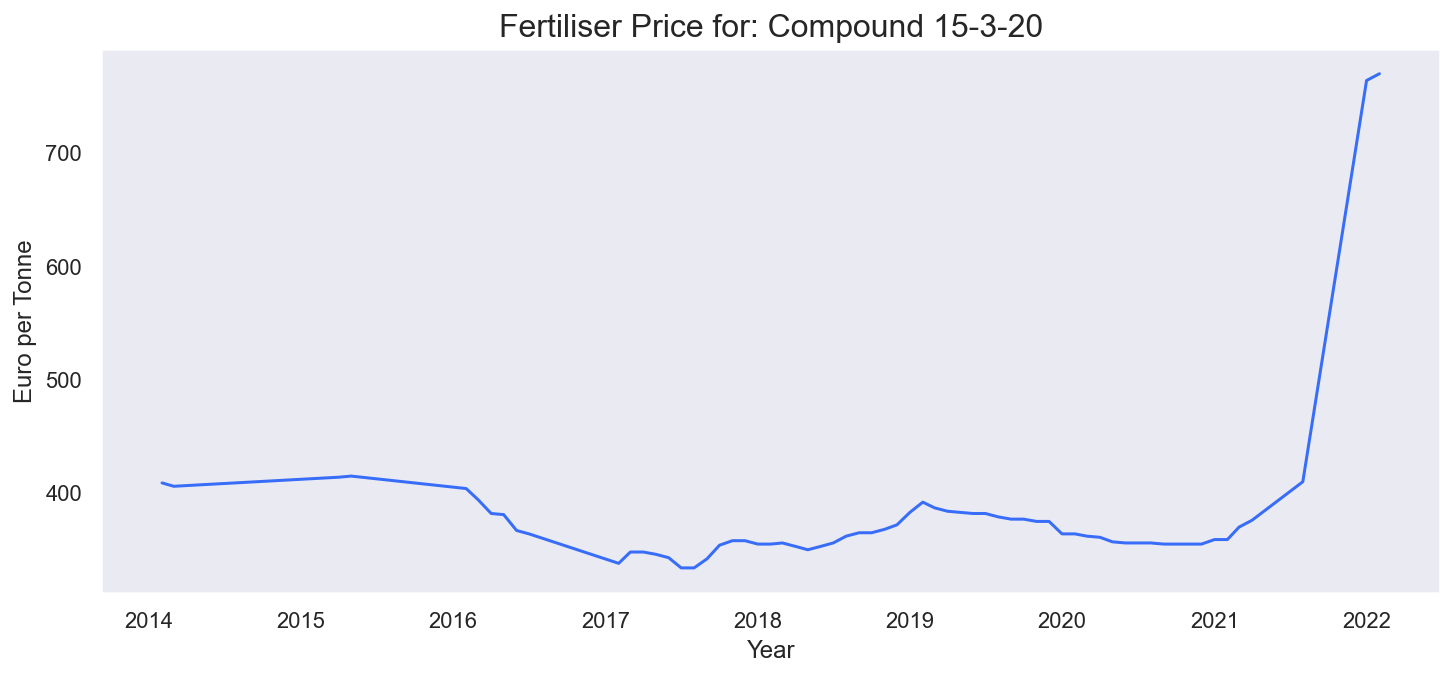

In [42]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# remove the grid on the chart
sns.set_style( {'axes.grid' : False})


# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data = df_com15, x="date", y="value");


#title
plt.title("Fertiliser Price for: Compound 15-3-20", fontsize = 16);

plt.ylabel('Euro per Tonne');
plt.xlabel('Year');

plt.show();

In [43]:
#filtering to a specific type
df_com18612 = df_fertiliser[df_fertiliser['fertiliser_type']=='Compound 18-6-12']
df_com18612

,statistic,date,fertiliser_type,unit,value,month_year,month,year
9,Fertiliser Price,1980-01-01,Compound 18-6-12,Euro per Tonne,157.0,1980-01,1,1980
33,Fertiliser Price,1980-02-01,Compound 18-6-12,Euro per Tonne,159.0,1980-02,2,1980
57,Fertiliser Price,1980-03-01,Compound 18-6-12,Euro per Tonne,161.0,1980-03,3,1980
81,Fertiliser Price,1980-04-01,Compound 18-6-12,Euro per Tonne,163.0,1980-04,4,1980
105,Fertiliser Price,1980-05-01,Compound 18-6-12,Euro per Tonne,164.0,1980-05,5,1980
...,...,...,...,...,...,...,...,...
12033,Fertiliser Price,2021-10-01,Compound 18-6-12,Euro per Tonne,499.0,2021-10,10,2021
12057,Fertiliser Price,2021-11-01,Compound 18-6-12,Euro per Tonne,505.0,2021-11,11,2021
12081,Fertiliser Price,2021-12-01,Compound 18-6-12,Euro per Tonne,593.0,2021-12,12,2021
12105,Fertiliser Price,2022-01-01,Compound 18-6-12,Euro per Tonne,707.0,2022-01,1,2022


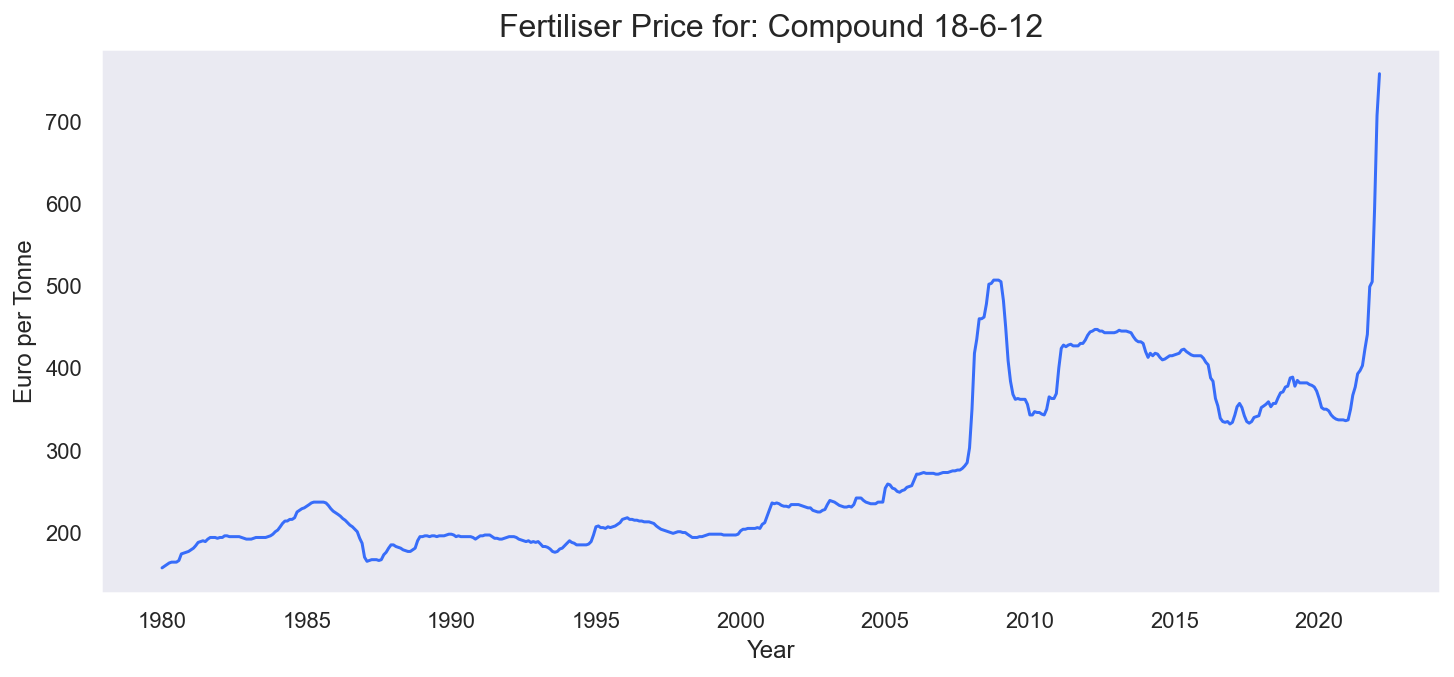

In [44]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(12, 5));  

# remove the grid on the chart
sns.set_style( {'axes.grid' : False})

# plotting month and IN, groupby if it is a bankholiday
sns.lineplot(data = df_com18612, x="date", y="value");

#plt.suptitle("Fertiliser Price for: Compound 15-3-20"); 
plt.title("Fertiliser Price for: Compound 18-6-12", fontsize = 16);

plt.ylabel('Euro per Tonne');
plt.xlabel('Year');

plt.show();

### Plot all charts
Plot a chart of each fertilizer type and check the price range for each tyep

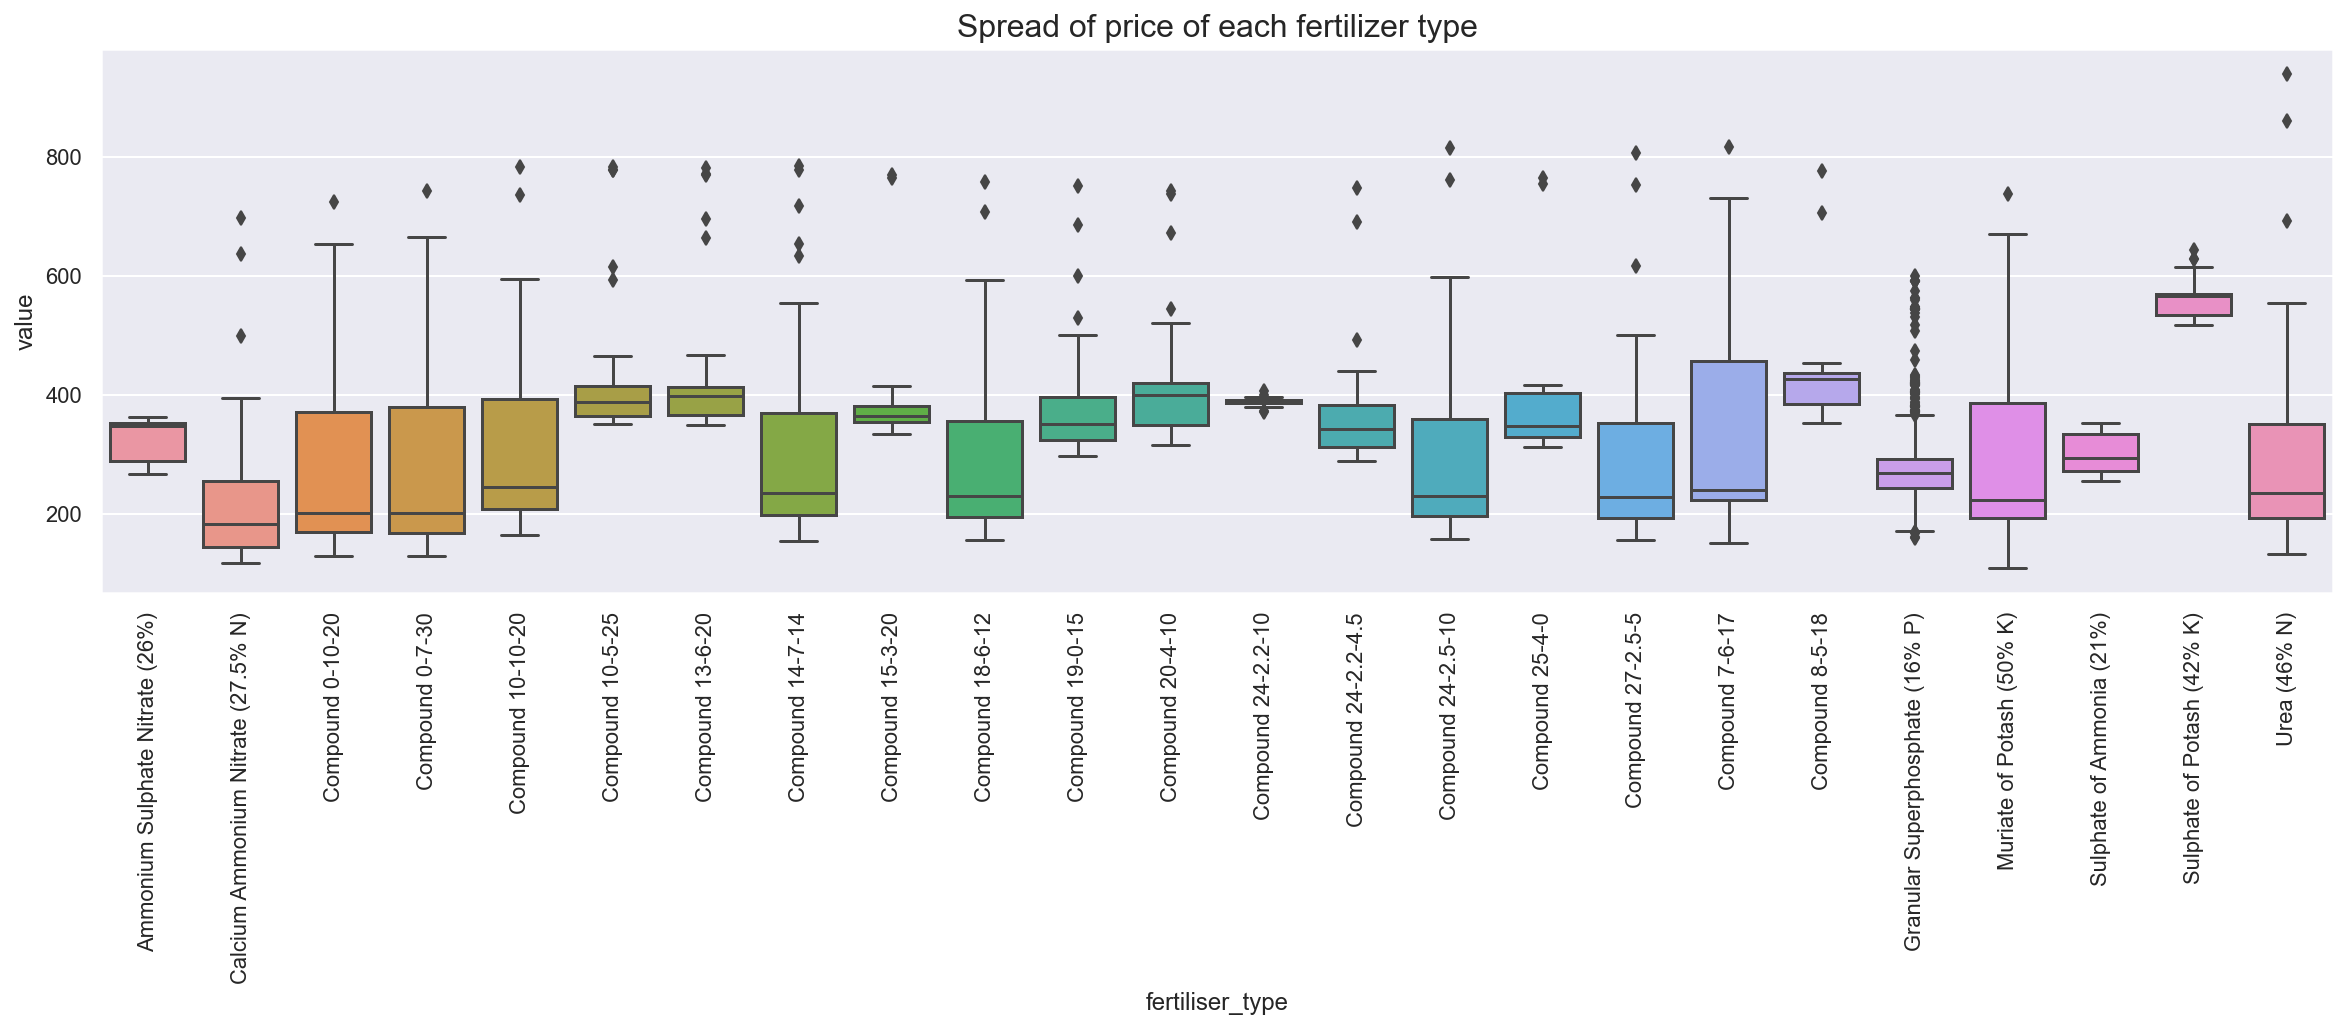

In [45]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(20, 5));  

# Type of fertilizer and Value   
ax = sns.boxplot(x="fertiliser_type", y="value", data=df_fertiliser);

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);
plt.title("Spread of price of each fertilizer type", fontsize=16);

In [46]:
df_fertiliser.describe()

,value,month,year
count,6557.000000,12144.000000,12144.000000
mean,288.982767,6.480237,2000.584980
std,114.851093,3.459763,12.172429
min,109.000000,1.000000,1980.000000
25%,196.000000,3.000000,1990.000000
50%,245.000000,6.000000,2001.000000
75%,378.000000,9.000000,2011.000000
max,939.000000,12.000000,2022.000000


In [47]:
#most common fertilizer is Ammonium Sulphate Nitrate (26%)

In [48]:
# summary statistics for each type of fertilizer
df_fertiliser.groupby(['fertiliser_type']).describe()

value                                 \
                                    count        mean         std    min   
fertiliser_type                                                            
Ammonium Sulphate Nitrate (26%)      46.0  326.065217   34.413435  267.0   
Calcium Ammonium Nitrate (27.5% N)  506.0  208.049407   78.420241  118.0   
Compound 0-10-20                    506.0  259.806324  116.174885  130.0   
Compound 0-7-30                     506.0  261.557312  120.193251  129.0   
Compound 10-10-20                   506.0  297.075099  111.711768  165.0   
Compound 10-5-25                     71.0  409.464789   89.785750  351.0   
Compound 13-6-20                     58.0  418.862069  102.425574  349.0   
Compound 14-7-14                    506.0  282.065217  108.296740  155.0   
Compound 15-3-20                     64.0  380.140625   72.616599  334.0   
Compound 18-6-12                    506.0  274.326087  100.085025  157.0   
Compound 19-0-15                     98.0  366.724490   69.382368  298.0   
Compound 20-4-10                    134.0  394.470149   64.346885  316.0   
Compound 24-2.2-10                   13.0  387.923077    9.903379  371.0   
Compound 24-2.2-4.5                  98.0  353.806122   66.405760  289.0   
Compound 24-2.5-10                  506.0  276.719368  104.132590  158.0   
Compound 25-4-0                      91.0  367.263736   68.571590  313.0   
Compound 27-2.5-5                   506.0  271.610672  102.111881  156.0   
Compound 7-6-17                     256.0  321.562500  130.570107  151.0   
Compound 8-5-18                     100.0  421.370000   55.619133  353.0   
Granular Superphosphate (16% P)     387.0  296.284238   89.336888  160.0   
Muriate of Potash (50% K)           465.0  284.666667  130.097057  109.0   
Sulphate of Ammonia (21%)            62.0  302.403226   32.465598  255.0   
Sulphate of Potash (42% K)           60.0  558.350000   29.155239  517.0   
Urea (46% N)                        506.0  272.924901  102.092941  133.0   

                                                                  month  \
                                       25%    50%     75%    max  count   
fertiliser_type                                                           
Ammonium Sulphate Nitrate (26%)     289.00  348.5  352.00  363.0  506.0   
Calcium Ammonium Nitrate (27.5% N)  145.00  183.0  255.75  697.0  506.0   
Compound 0-10-20                    169.00  201.0  370.75  724.0  506.0   
Compound 0-7-30                     168.00  201.0  379.25  743.0  506.0   
Compound 10-10-20                   209.00  245.0  392.50  782.0  506.0   
Compound 10-5-25                    364.00  388.0  414.50  782.0  506.0   
Compound 13-6-20                    367.00  397.5  414.00  781.0  506.0   
Compound 14-7-14                    199.00  235.0  368.75  785.0  506.0   
Compound 15-3-20                    355.00  364.0  382.00  770.0  506.0   
Compound 18-6-12                    195.00  231.0  356.00  758.0  506.0   
Compound 19-0-15                    324.25  351.5  396.75  750.0  506.0   
Compound 20-4-10                    349.00  400.5  420.00  742.0  506.0   
Compound 24-2.2-10                  386.00  388.0  391.00  407.0  506.0   
Compound 24-2.2-4.5                 313.00  343.5  383.75  748.0  506.0   
Compound 24-2.5-10                  196.00  231.0  360.00  814.0  506.0   
Compound 25-4-0                     329.50  347.0  403.00  764.0  506.0   
Compound 27-2.5-5                   193.00  228.0  352.75  807.0  506.0   
Compound 7-6-17                     223.00  240.5  457.25  817.0  506.0   
Compound 8-5-18                     385.00  427.0  436.25  776.0  506.0   
Granular Superphosphate (16% P)     244.00  268.0  293.00  599.0  506.0   
Muriate of Potash (50% K)           194.00  223.0  387.00  738.0  506.0   
Sulphate of Ammonia (21%)           272.50  294.0  334.00  352.0  506.0   
Sulphate of Potash (42% K)          534.75  566.5  570.00  643.0  506.0   
Urea (46% N)                     

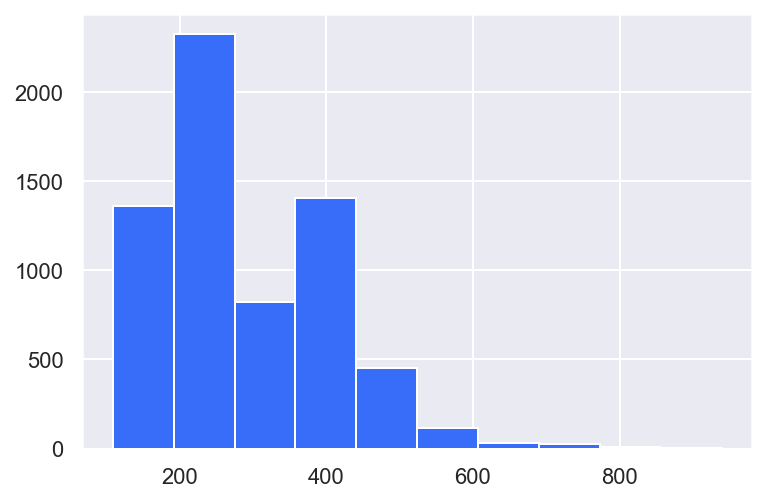

In [49]:
plt.hist(df_fertiliser['value']);
plt.show();

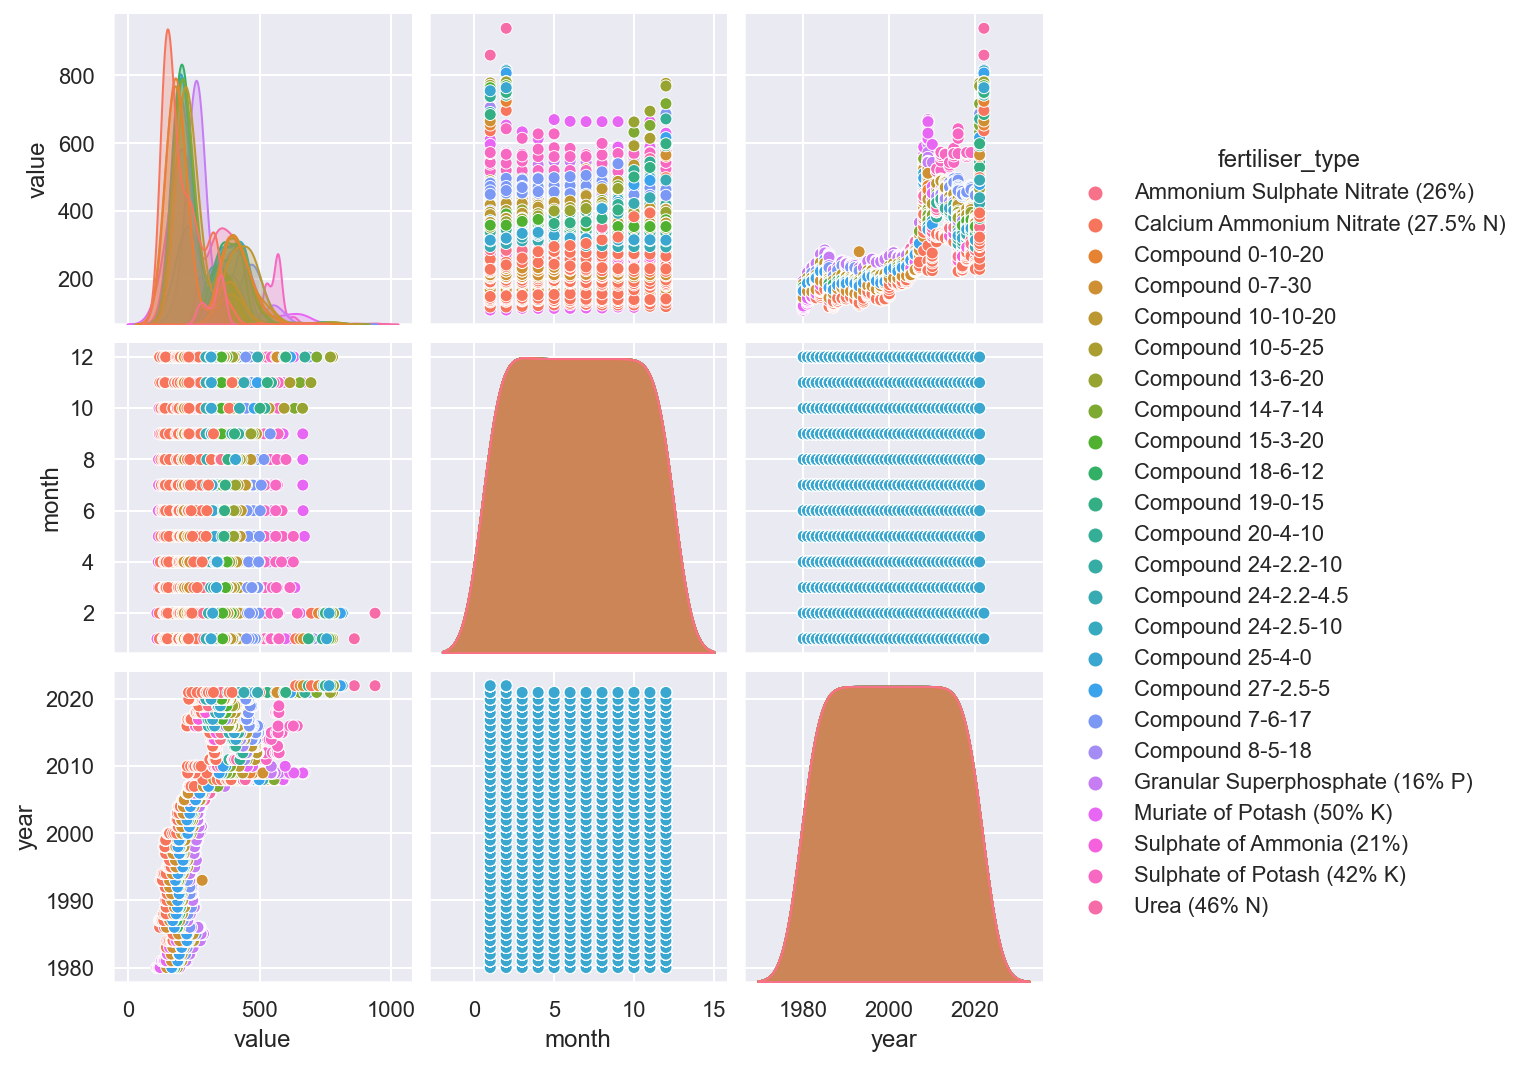

In [50]:
#pairplot
sns.pairplot(df_fertiliser, hue="fertiliser_type");
plt.show();

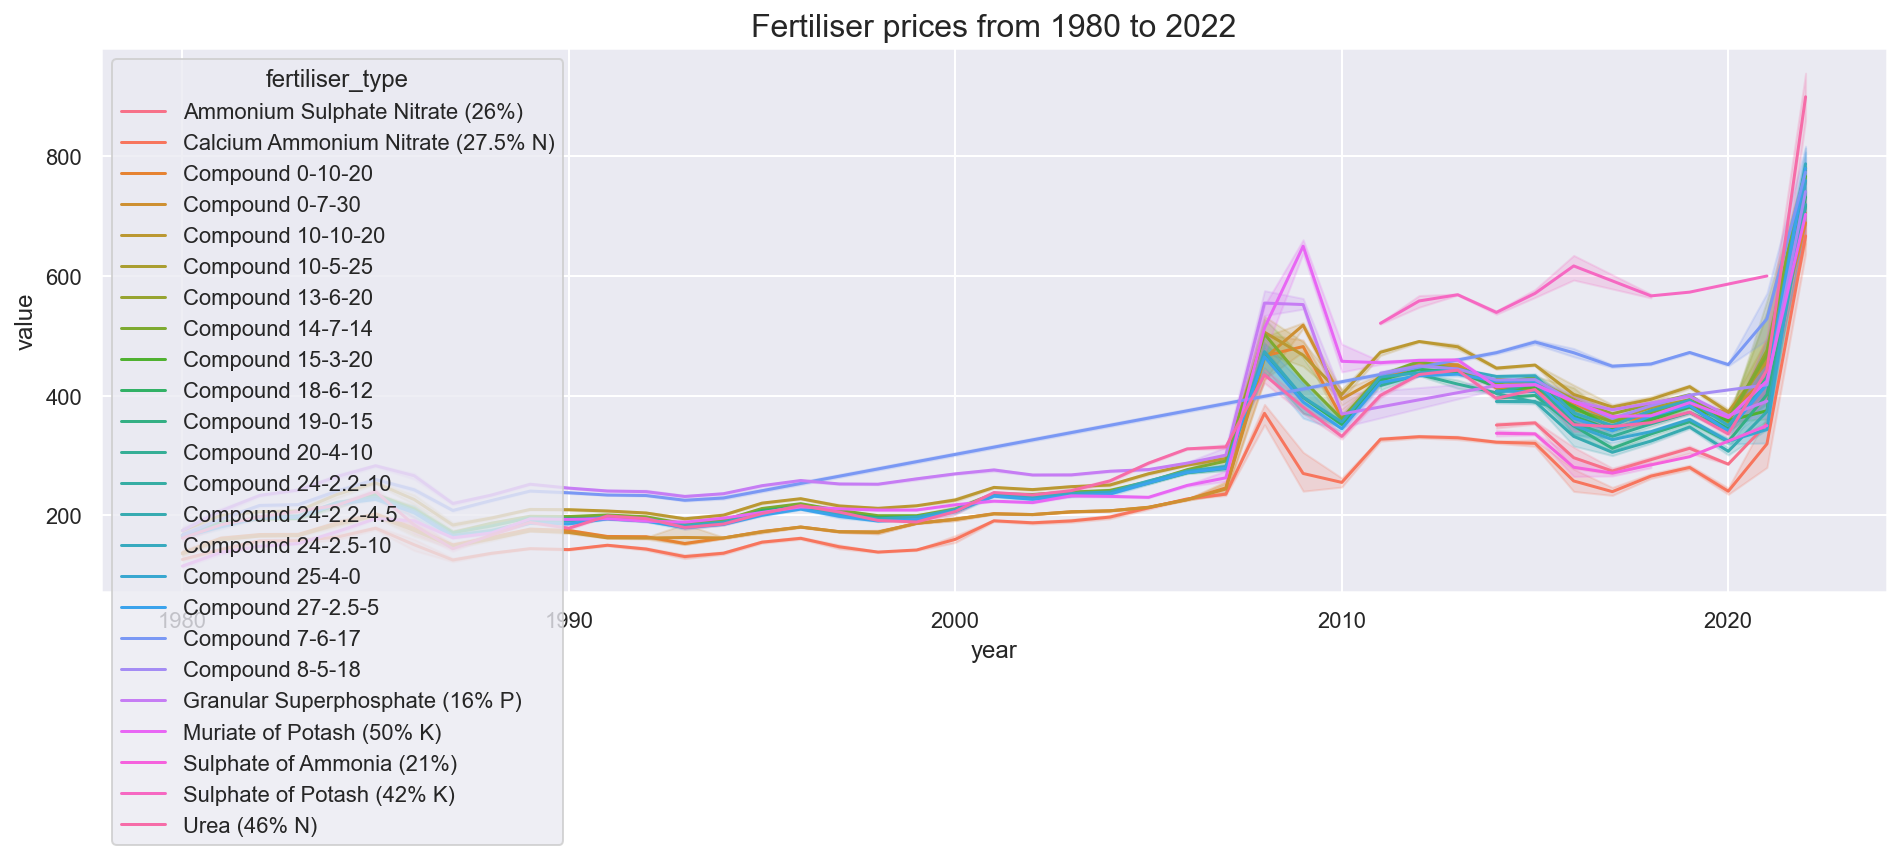

In [51]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.lineplot(x = 'year', y = 'value', data = df_fertiliser, hue='fertiliser_type');

plt.title("Fertiliser prices from 1980 to 2022", fontsize = 16);

#rotate x-axis labels
plt.show();

Big upward trend in Prices in 2008 and again in 2022.

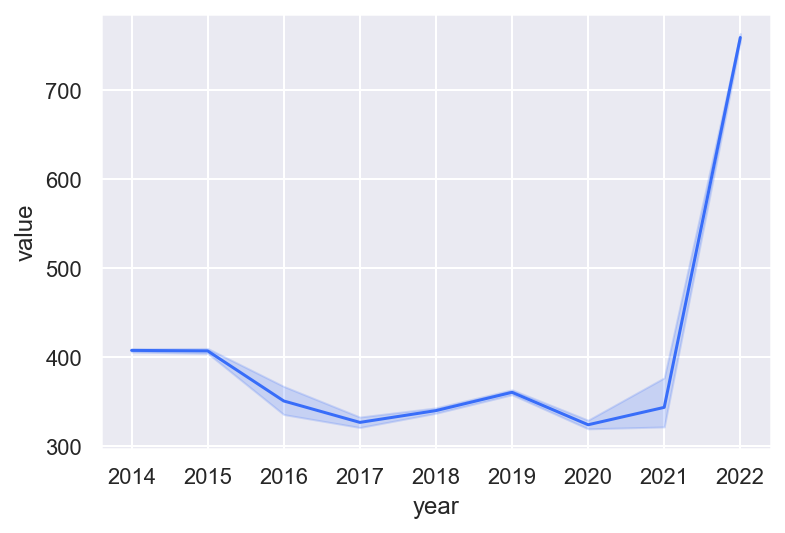

In [52]:
#looking at a specific variable
x_cat = df_fertiliser[df_fertiliser['fertiliser_type']=='Compound 25-4-0']
#x_cat
sns.lineplot(x = 'year', y ='value', data = x_cat);
plt.show();

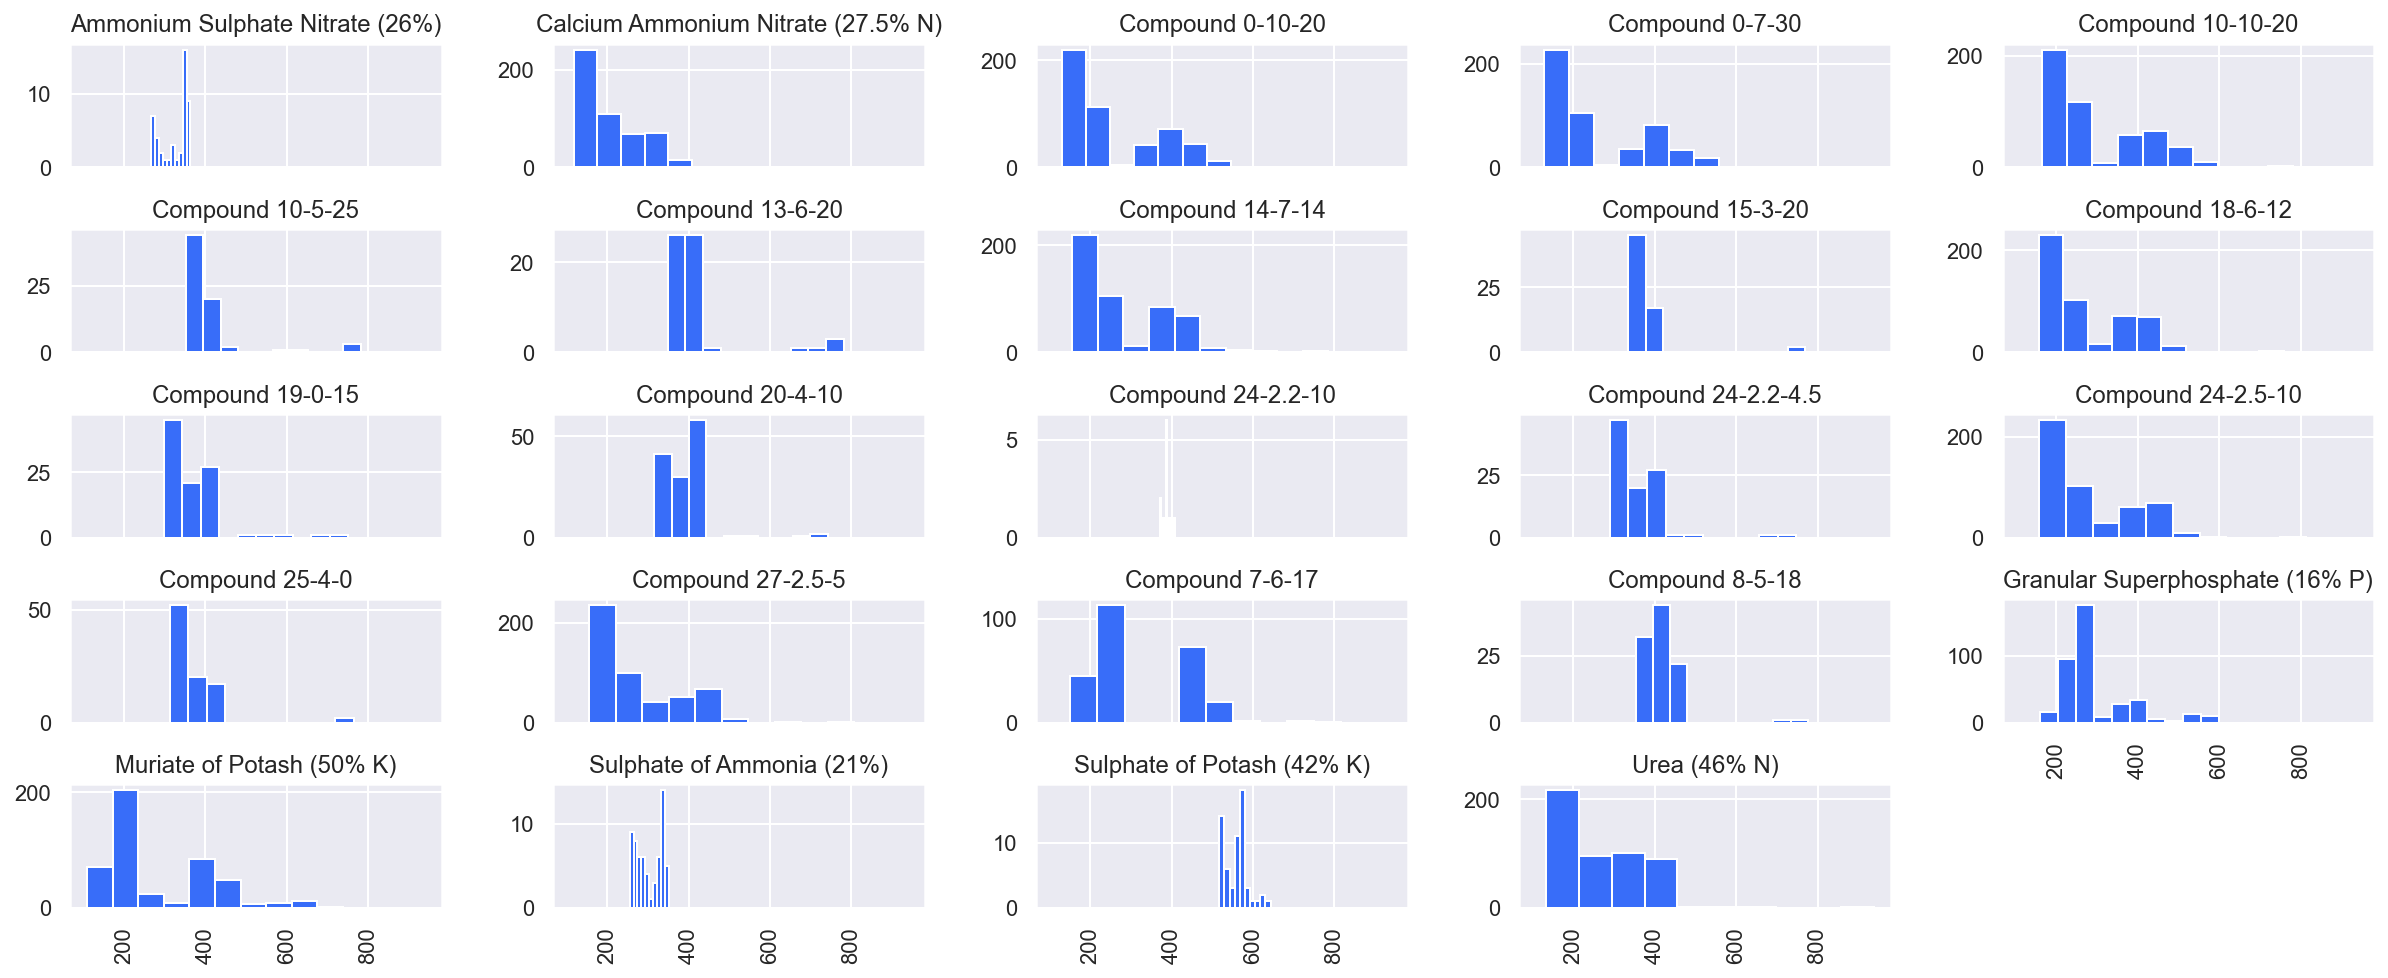

In [73]:
#set to seaborn
sns.set();
#palette
sns.set_palette('rainbow');


df_fertiliser.hist(by='fertiliser_type',
                   column = 'value', 
                   figsize=(20, 8), 
                   rwidth = 0.9, 
                   sharex = True);   # share the x axis

#title
plt.title("Histogram of all fertiliser types", fontsize = 16);

#show
plt.show();

### Investigating materials that make up Fertiliser

Data for potassium chloride was collected from 

https://www.indexmundi.com/commodities/?commodity=potassium-chloride&months=240&currency=eur


Rock phosphate

https://www.indexmundi.com/commodities/?commodity=rock-phosphate&months=360&currency=eur

Urea

https://www.indexmundi.com/commodities/?commodity=urea&months=240&currency=eur


In [53]:
#Adding a column for the type for each dataset
df_phosphate['type'] = 'Rock phosphate'

df_potassium['type'] = 'Potassium chloride'

df_urea['type'] = 'Urea'

In [54]:
# list of the datasets to be combined
datasets = [df_phosphate, df_potassium,df_urea ] 

df_materials = pd.DataFrame() # create dataframe
# loop through datasets
for dataset in datasets: 
    # add dataset to the bottom of the total 
    df_materials = df_materials.append(dataset) 

In [55]:
#lowercase
df_materials = df_materials.rename(str.lower, axis='columns')
#change column name to date
df_materials = df_materials.rename(columns = {"month": "date"})

In [56]:
#removing the M and replacing with the -
df_materials['date'] = df_materials['date'].str.replace(" ", "-")
df_materials

,date,price,change,type
0,Oct-1998,27.45,-,Rock phosphate
1,Nov-1998,27.90,1.63%,Rock phosphate
2,Dec-1998,27.75,-0.55%,Rock phosphate
3,Jan-1999,28.00,0.92%,Rock phosphate
4,Feb-1999,36.70,31.08%,Rock phosphate
...,...,...,...,...
236,Nov-2021,787.96,31.55%,Urea
237,Dec-2021,787.76,-0.03%,Urea
238,Jan-2022,748.38,-5.00%,Urea
239,Feb-2022,656.15,-12.32%,Urea


In [57]:
# date format
df_materials['date'] = pd.to_datetime(df_materials['date'], format='%b-%Y')
df_materials['month_year'] = pd.to_datetime(df_materials['date']).dt.to_period('M')
df_materials['month'] = pd.DatetimeIndex(df_materials['date']).month
df_materials['year'] = pd.DatetimeIndex(df_materials['date']).year
df_materials.head(5)

,date,price,change,type,month_year,month,year
0,1998-10-01,27.45,-,Rock phosphate,1998-10,10,1998
1,1998-11-01,27.90,1.63%,Rock phosphate,1998-11,11,1998
2,1998-12-01,27.75,-0.55%,Rock phosphate,1998-12,12,1998
3,1999-01-01,28.00,0.92%,Rock phosphate,1999-01,1,1999
4,1999-02-01,36.70,31.08%,Rock phosphate,1999-02,2,1999


Comparing the prices for Urea, phosphate and Potassium chloride

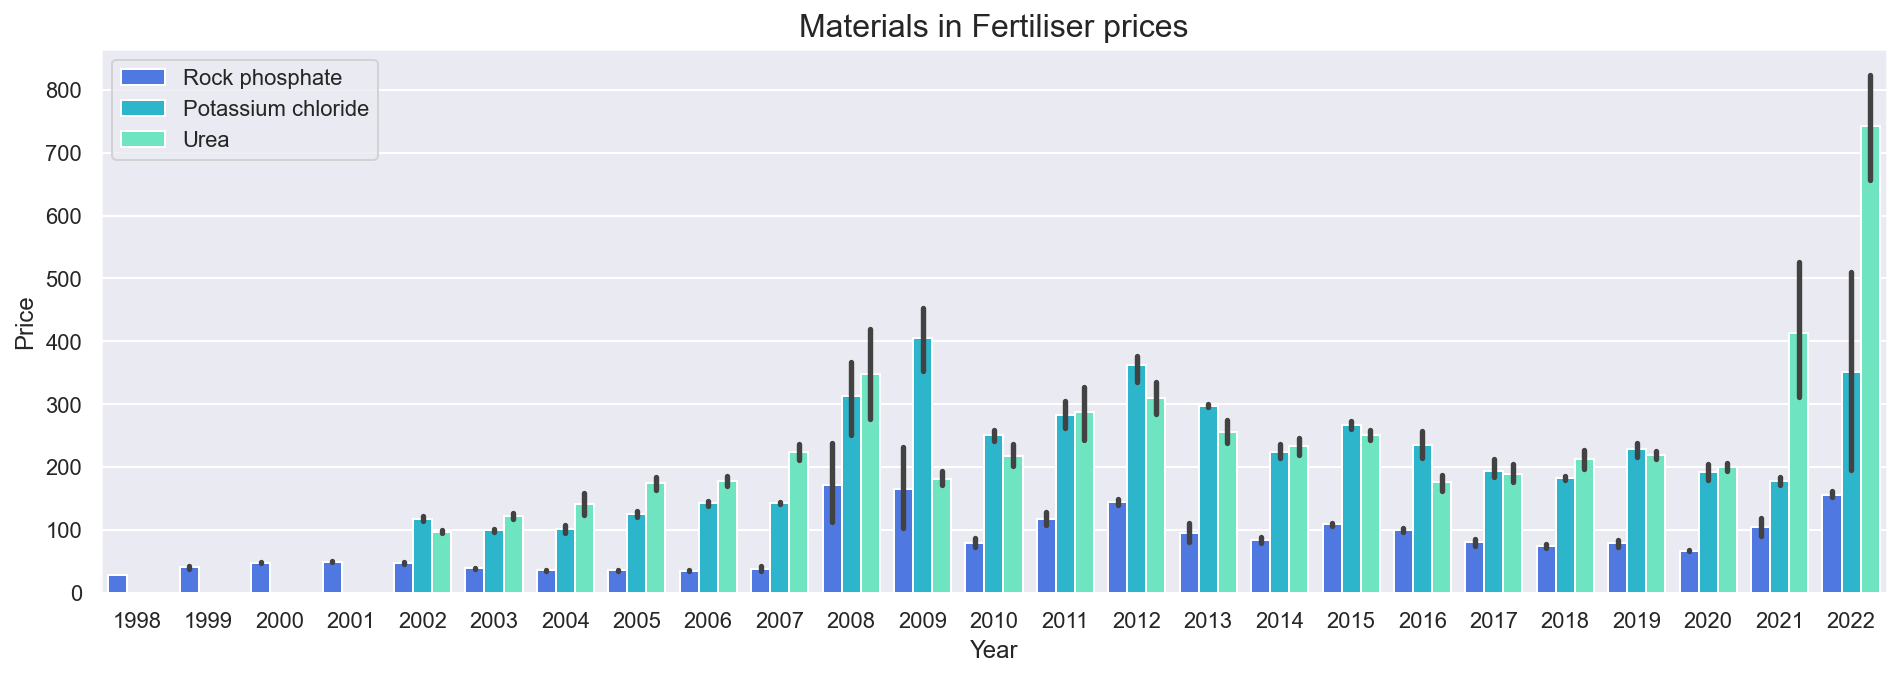

In [58]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

# bar plot of the the materials that make up Fertiliser
sns.barplot(x="year", y="price", hue='type', data=df_materials);

#styling
plt.title("Materials in Fertiliser prices", fontsize = 16);
plt.legend(loc="upper left")
plt.ylabel("Price")
plt.xlabel("Year")
plt.show();

The price of UREA has increased the most in the last few years

### Milk

In [59]:
#removing the M and replacing with the -
df_milk['Month'] = df_milk['Month'].str.replace("M", "-")

In [60]:
# date format
df_milk['Month'] = pd.to_datetime(df_milk['Month'], format='%Y-%m')

In [61]:
df_milk['month_year'] = pd.to_datetime(df_milk['Month']).dt.to_period('M')
df_milk['month'] = pd.DatetimeIndex(df_milk['Month']).month
df_milk['year'] = pd.DatetimeIndex(df_milk['Month']).year

In [62]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATISTIC     412 non-null    object        
 1   Statistic     412 non-null    object        
 2   TLIST(M1)     412 non-null    int64         
 3   Month         412 non-null    datetime64[ns]
 4   C02136V02577  412 non-null    int64         
 5   Product       412 non-null    object        
 6   UNIT          412 non-null    object        
 7   VALUE         412 non-null    float64       
 8   month_year    412 non-null    period[M]     
 9   month         412 non-null    int64         
 10  year          412 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), period[M](1)
memory usage: 35.5+ KB


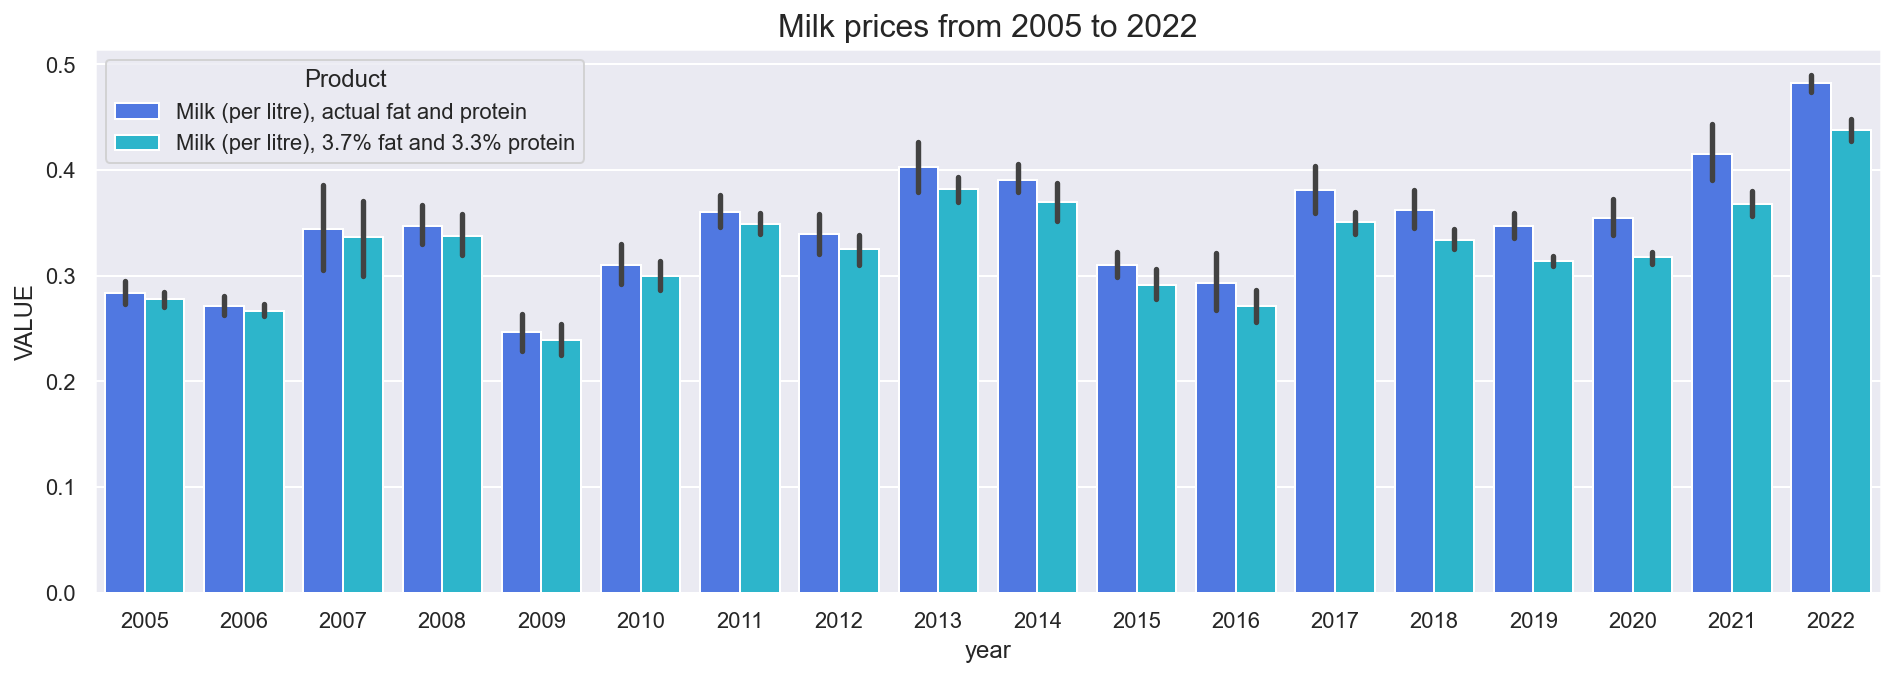

In [63]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.barplot(x = 'year', y = 'VALUE', data = df_milk, hue='Product');

plt.title("Milk prices from 2005 to 2022", fontsize = 16);
plt.show();

### Consumption of inorganic fertilizers

Data of EU countries consumption of Nitrogen and Phosphorus from Eurostat.

https://ec.europa.eu/eurostat/databrowser/view/AEI_FM_USEFERT__custom_2575740/default/table?lang=en

In [64]:
df_consum_eu

,DATAFLOW,LAST UPDATE,freq,nutrient,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2000,13943.0,NaN
1,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2001,18131.0,NaN
2,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2002,18187.0,NaN
3,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2003,20028.0,NaN
4,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,N,T,AL,2004,16511.0,NaN
...,...,...,...,...,...,...,...,...,...
4402,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2015,85555.0,NaN
4403,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2016,85989.0,NaN
4404,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2017,85116.0,NaN
4405,ESTAT:AEI_FM_USEFERT(1.0),09/03/22 23:00:00,A,P,T,UK,2018,82060.0,NaN


In [65]:
# dataflow is not useful
# last update is not useful
# freq is only annual so not useful so removing 
df_consum_eu = df_consum_eu.drop(['DATAFLOW','LAST UPDATE', 'freq', 'OBS_FLAG'],  1)

In [66]:
# N represents Nitrogen
df_consum_eu['nutrient'] = df_consum_eu['nutrient'].replace({'N' : 'Nitrogen'}, regex=True)
# P represents Phosphorous
df_consum_eu['nutrient'] = df_consum_eu['nutrient'].replace({'P' : 'Phosphorus'}, regex=True)
# T represents Tonne
df_consum_eu['unit'] = df_consum_eu['unit'].replace({'T' : 'Tonne'}, regex=True)

#lowercase case the column names
df_consum_eu = df_consum_eu.rename(str.lower, axis='columns')

In [67]:
# change fr
df_consum_eu.obs_value = df_consum_eu.obs_value.astype('Int64')
#
#df_consum_eu['time_period'] = pd.DatetimeIndex(df_consum_eu['time_period']).year
#lowercase case the column names
#df_consum_eu = df_consum_eu.rename(str.lower, axis='columns')
df_consum_eu = df_consum_eu.rename(columns = {"time_period": "date"})


df_consum_eu['year'] = pd.DatetimeIndex(df_consum_eu['date']).year
df_consum_eu

,nutrient,unit,geo,date,obs_value,year
0,Nitrogen,Tonne,AL,2000,13943,1970
1,Nitrogen,Tonne,AL,2001,18131,1970
2,Nitrogen,Tonne,AL,2002,18187,1970
3,Nitrogen,Tonne,AL,2003,20028,1970
4,Nitrogen,Tonne,AL,2004,16511,1970
...,...,...,...,...,...,...
4402,Phosphorus,Tonne,UK,2015,85555,1970
4403,Phosphorus,Tonne,UK,2016,85989,1970
4404,Phosphorus,Tonne,UK,2017,85116,1970
4405,Phosphorus,Tonne,UK,2018,82060,1970


In [68]:
df_consum_eu['date'] = pd.to_datetime(df_consum_eu['year'], format='%Y')


In [69]:
df_consum_eu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   nutrient   4407 non-null   object        
 1   unit       4407 non-null   object        
 2   geo        4407 non-null   object        
 3   date       4407 non-null   datetime64[ns]
 4   obs_value  4406 non-null   Int64         
 5   year       4407 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(3)
memory usage: 211.0+ KB


In [70]:
# Ireland and Poland
eu_list = ['IE', 'PL']


df_eu_subset =  df_consum_eu[df_consum_eu['geo'].isin(eu_list) ]

df_eu_subset

,nutrient,unit,geo,date,obs_value,year
1049,Nitrogen,Tonne,IE,1970-01-01,407598,1970
1050,Nitrogen,Tonne,IE,1970-01-01,368667,1970
1051,Nitrogen,Tonne,IE,1970-01-01,363513,1970
1052,Nitrogen,Tonne,IE,1970-01-01,388080,1970
1053,Nitrogen,Tonne,IE,1970-01-01,362525,1970
...,...,...,...,...,...,...
3516,Phosphorus,Tonne,PL,1970-01-01,142281,1970
3517,Phosphorus,Tonne,PL,1970-01-01,149950,1970
3518,Phosphorus,Tonne,PL,1970-01-01,147865,1970
3519,Phosphorus,Tonne,PL,1970-01-01,149961,1970


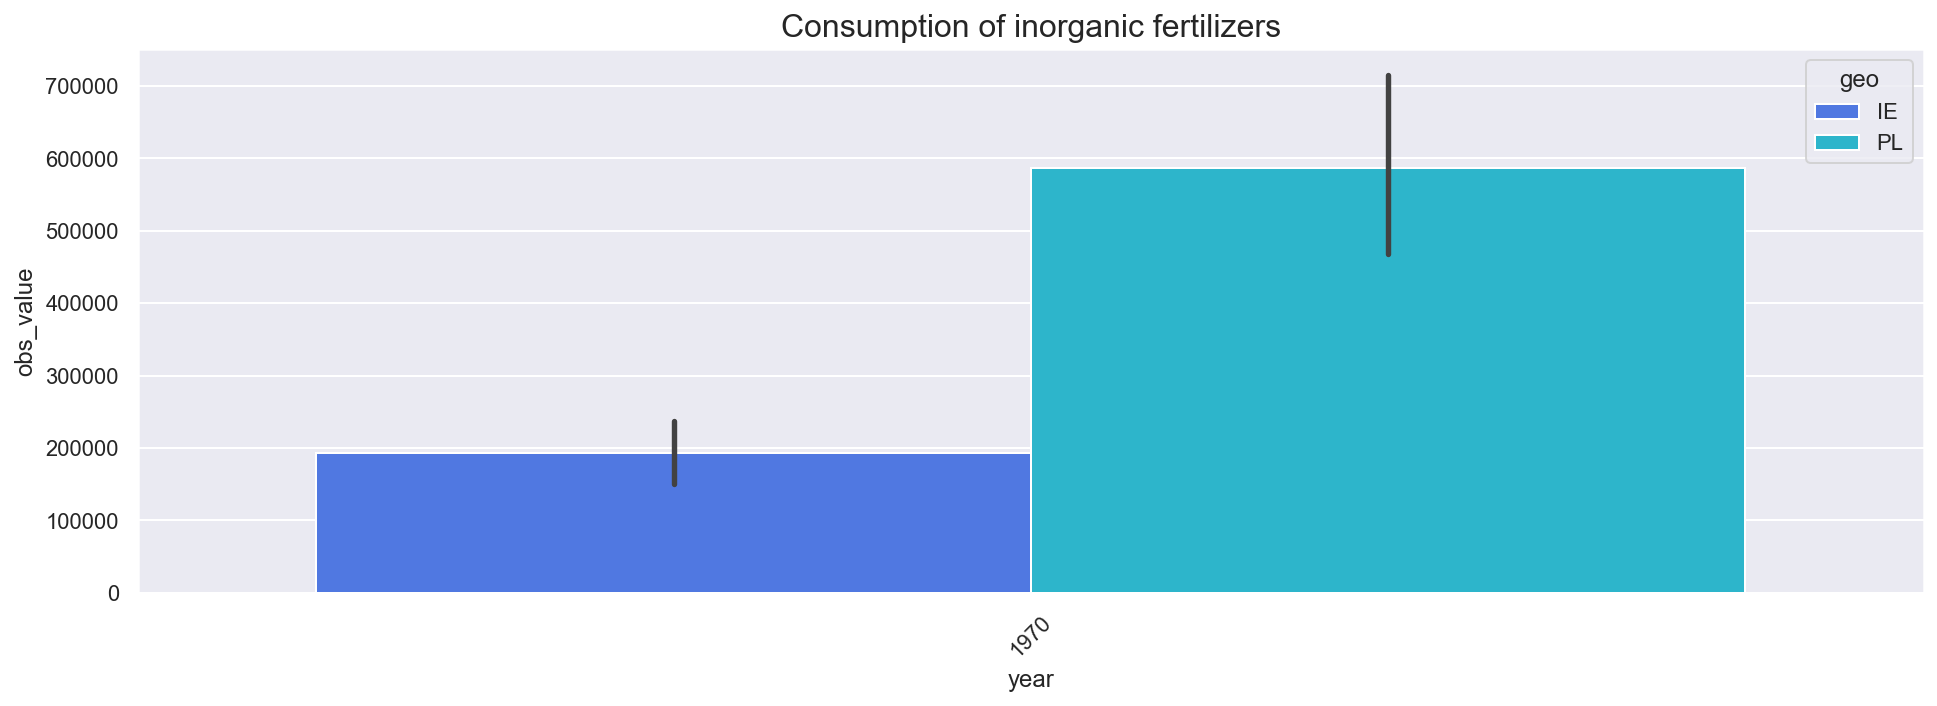

In [71]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(16, 5));  

sns.barplot(x = 'year', y = 'obs_value', data = df_eu_subset, hue='geo');

plt.title("Consumption of inorganic fertilizers", fontsize = 16);

#rotate x-axis labels
plt.xticks(rotation=45);
plt.show();

# Sentiment analysis of tweets

In [72]:
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text
0,0,2022-04-27 08:42:30+00:00,1519235527324712960,‘Surging input costs are keeping #farmers awak...
1,1,2022-04-02 17:15:52+00:00,1510305024081117190,@jerwaugh @youngsiward Would you not agree tha...
2,2,2022-02-27 16:15:11+00:00,1497968564069879813,@libraryturner @lidl_ireland Don’t get used to...
3,3,2021-12-01 15:46:31+00:00,1466071216813395972,@AgrilandIreland Please show how many Irish Fa...
4,4,2021-05-22 23:44:38+00:00,1396250682651463685,@DriiftLive Please clarify who will be refundi...


In [73]:
# convert to datetime
df_tweets['Datetime'] = pd.to_datetime(df_tweets['Datetime']).dt.date

In [74]:
# convert the date column to date format
df_tweets['Datetime'] = df_tweets['Datetime'].apply(pd.to_datetime)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  5 non-null      int64         
 1   Datetime    5 non-null      datetime64[ns]
 2   Tweet Id    5 non-null      int64         
 3   Text        5 non-null      object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 288.0+ bytes


### Looking at twitter from 2022 only

In [75]:
df_tweets = df_tweets[(df_tweets['Datetime'] > "2022-01-01") & (df_tweets['Datetime'] < "2022-04-29")]


In [76]:
#get the word count of the tweet
df_tweets["word_count"] = df_tweets["Text"].apply(lambda x: len(str(x).split()))


In [77]:
#get the word count of the tweet
df_tweets["char_count"] = df_tweets["Text"].str.len()

### Natural Language processing

### Topic modelling
https://www.youtube.com/watch?v=NYkbqzTlW3w
https://www.youtube.com/watch?v=VraAbgAoYSk

In [78]:
#https://www.nltk.org/
import nltk #natural langugage toolkit

In [79]:
#download stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritaraher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
from nltk.corpus import stopwords
#remove stopwords
stop = stopwords.words("english")

In [81]:
# counting stop words
#stop words
df_tweets["stopwords"]= df_tweets["Text"].apply(lambda x: len([x for x in x.split() if x in stop]))

In [82]:
#count hashtags
df_tweets["hashtag"]= df_tweets["Text"].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

#clean the tweet removes the @username, not useful
df_tweets["tweet_clean"] = df_tweets["tweet_clean"].str.replace("@[^\s]+", "")

#remove numbers
df_tweets["tweet_clean"] = df_tweets["tweet_clean"].str.replace("\w*\d\w*", "")

#remove punctuation
import re

df_tweets["tweet_clean"] = df_tweets["tweet_clean"].str.replace('[^\w\s]','')

In [83]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    text = text.lower()                                              #lowercase
    text = re.sub('\[.*?\]', '', text)                               #remove the twitter handle
    text = re.sub('@[^\s]+', '', text)                               # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # remove punctuation
    text = re.sub('\w*\d\w*', '', text)                              #remove words containing numbers
    text = re.sub('\n', '', text)                                    # remove \n
    return text

round1 = lambda x: clean_text_round1(x)

In [84]:
# Let's take a look at the updated text
df_tweets['tweet_clean'] = df_tweets.Text.apply(round1)
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text,word_count,char_count,stopwords,hashtag,tweet_clean
0,0,2022-04-27,1519235527324712960,‘Surging input costs are keeping #farmers awak...,17,139,2,3,‘surging input costs are keeping farmers awake...
1,1,2022-04-02,1510305024081117190,@jerwaugh @youngsiward Would you not agree tha...,44,259,20,0,would you not agree that if you owned a wind...
2,2,2022-02-27,1497968564069879813,@libraryturner @lidl_ireland Don’t get used to...,28,169,9,0,don’t get used to it costs are rising to muc...


In [85]:
#removing stop words from tweet clean
df_tweets["tweet_clean"]= df_tweets["tweet_clean"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

### Sentiment Analysis with TextBlob

In [86]:
##semantic analysis
from textblob import TextBlob
df_tweets["tweet_clean"][:5].apply(lambda x : TextBlob(x).sentiment)

#   (-0.5, 1.0)
# sentiment of being negative because of the -, subjective

0                                   (0.0, 0.0)
1    (0.05333333333333334, 0.6133333333333334)
2                                   (0.1, 0.6)
Name: tweet_clean, dtype: object

In [87]:
df_tweets["polarity"]= df_tweets["tweet_clean"].apply(lambda x : TextBlob(x).sentiment[0])

#   (-0.5, 1.0)
# sentiment of being negative because of the -, subjective

In [88]:
df_tweets["subjectivity"]= df_tweets["tweet_clean"].apply(lambda x : TextBlob(x).sentiment[1])

In [89]:
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text,word_count,char_count,stopwords,hashtag,tweet_clean,polarity,subjectivity
0,0,2022-04-27,1519235527324712960,‘Surging input costs are keeping #farmers awak...,17,139,2,3,‘surging input costs keeping farmers awake nig...,0.000000,0.000000
1,1,2022-04-02,1510305024081117190,@jerwaugh @youngsiward Would you not agree tha...,44,259,20,0,would agree owned wind farm ccgt would making ...,0.053333,0.613333
2,2,2022-02-27,1497968564069879813,@libraryturner @lidl_ireland Don’t get used to...,28,169,9,0,don’t get used costs rising much farm level it...,0.100000,0.600000


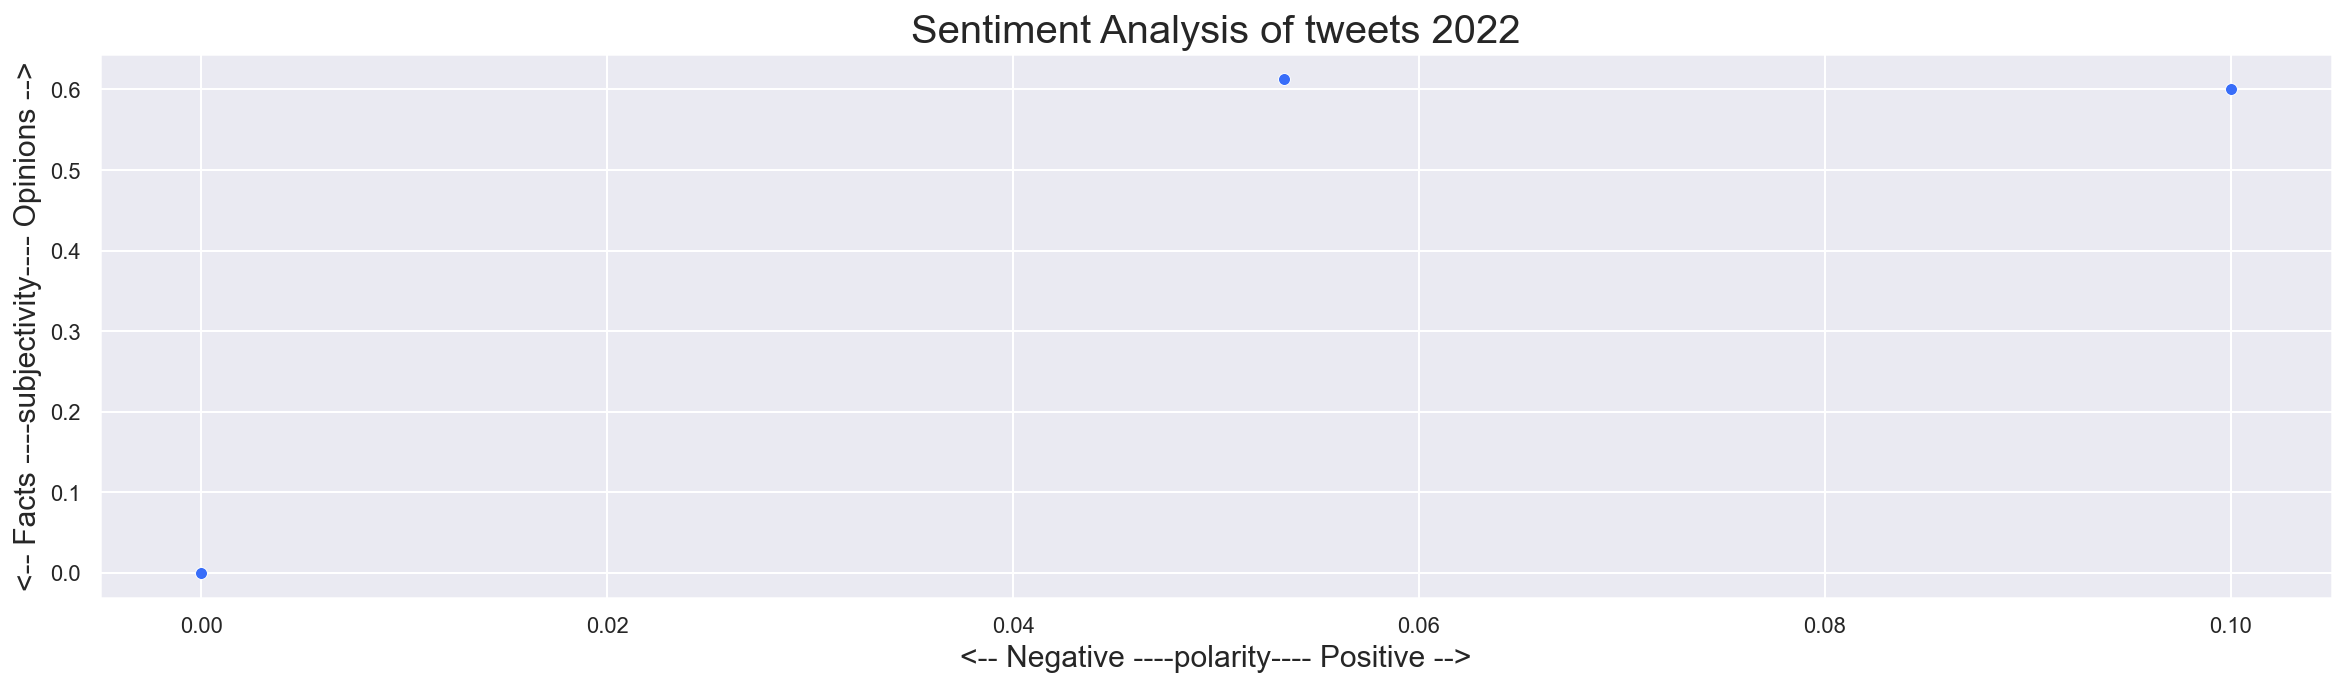

In [90]:
#set to seaborn
sns.set()
#palette
sns.set_palette('rainbow');
#plot size
plt.figure(figsize=(20, 5));  

sns.scatterplot(data=df_tweets, x="polarity", y="subjectivity")

plt.title("Sentiment Analysis of tweets 2022", fontsize=20);
plt.xlabel('<-- Negative ----polarity---- Positive -->', fontsize=15);
plt.ylabel('<-- Facts ----subjectivity---- Opinions -->', fontsize=15);

plt.show();

### Document term matrix

https://analyticsindiamag.com/a-guide-to-term-document-matrix-with-its-implementation-in-r-and-python/

In [91]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words="english")
data_cv = cv.fit_transform(df_tweets['tweet_clean'])
data_dtm =pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

# Pickle it for later use
import pickle
pickle.dump(cv, open("../data/cv_stop.pkl", "wb"))

data_dtm

,agree,agribusiness,awake,bear,ccgt,consumers,cost,costs,don,electricity,...,profits,report,rise,rising,store,superprofits,surging,used,wholesale,wind
0,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,0,0,1,1,1,1,1,0,1,...,1,0,0,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,1,1,0,...,0,0,1,1,1,0,0,1,0,0


In [92]:
#Gensism Python framework for fast Vector Space Modelling
from gensim import matutils, models
#ndustrial-strength Natural Language Processing (NLP) in Python
import scipy.sparse

In [93]:
### Topic modelling

In [94]:
# One of the required inputs is a term-document matrix
data_dtm = data_dtm.transpose()
data_dtm.head()

,0,1,2
agree,0,1,0
agribusiness,1,0,0
awake,1,0,0
bear,0,1,0
ccgt,0,1,0


In [95]:
# turn term matrix into a sparse matrix
sparse_counts = scipy.sparse.csr_matrix(data_dtm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [96]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
#cv = pickle.load(open("../data/cv_stop.pkl", "rb"))

In [97]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [98]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, passes=10)
lda.print_topics()

[(0,
  '0.051*"farm" + 0.050*"costs" + 0.030*"agribusiness" + 0.030*"massive" + 0.030*"profits" + 0.030*"farmers" + 0.030*"ccgt" + 0.030*"low" + 0.030*"cost" + 0.030*"bear"'),
 (1,
  '0.051*"costs" + 0.051*"farm" + 0.051*"prices" + 0.050*"inevitable" + 0.050*"used" + 0.050*"store" + 0.050*"know" + 0.050*"rise" + 0.050*"rising" + 0.050*"level"')]

In [99]:
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=3, passes=10)
lda.print_topics()

[(0,
  '0.027*"farm" + 0.027*"costs" + 0.027*"night" + 0.027*"surging" + 0.027*"farmers" + 0.027*"irish" + 0.027*"ifac" + 0.027*"awake" + 0.027*"report" + 0.027*"input"'),
 (1,
  '0.043*"farm" + 0.043*"costs" + 0.043*"prices" + 0.042*"profits" + 0.042*"wind" + 0.042*"ccgt" + 0.042*"superprofits" + 0.042*"wholesale" + 0.042*"owned" + 0.042*"agree"'),
 (2,
  '0.066*"costs" + 0.066*"farm" + 0.038*"used" + 0.038*"rise" + 0.038*"rising" + 0.038*"level" + 0.038*"know" + 0.038*"inevitable" + 0.038*"don" + 0.038*"store"')]

In [100]:
# LDA for num_topics = 4
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=4, passes=10)
lda.print_topics()

[(0,
  '0.027*"consumers" + 0.027*"high" + 0.027*"massive" + 0.027*"profits" + 0.027*"cost" + 0.027*"owned" + 0.027*"ccgt" + 0.027*"prices" + 0.027*"low" + 0.027*"superprofits"'),
 (1,
  '0.027*"costs" + 0.027*"farm" + 0.027*"used" + 0.027*"don" + 0.027*"store" + 0.027*"level" + 0.027*"inevitable" + 0.027*"rise" + 0.027*"rising" + 0.027*"know"'),
 (2,
  '0.057*"farm" + 0.057*"prices" + 0.057*"costs" + 0.032*"production" + 0.032*"bear" + 0.032*"agree" + 0.032*"wind" + 0.032*"inevitable" + 0.032*"making" + 0.032*"wholesale"'),
 (3,
  '0.059*"costs" + 0.059*"farm" + 0.059*"farmers" + 0.059*"agribusiness" + 0.059*"ifac" + 0.059*"irish" + 0.059*"night" + 0.059*"surging" + 0.059*"keeping" + 0.059*"report"')]

### Topic Modeling - Attempt #2 (Nouns Only)

In [101]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [102]:
# Apply the nouns function to the transcripts to filter only on nouns
df_tweets['data_nouns'] = pd.DataFrame(df_tweets.tweet_clean.apply(nouns))
df_tweets

,Unnamed: 0,Datetime,Tweet Id,Text,word_count,char_count,stopwords,hashtag,tweet_clean,polarity,subjectivity,data_nouns
0,0,2022-04-27,1519235527324712960,‘Surging input costs are keeping #farmers awak...,17,139,2,3,‘surging input costs keeping farmers awake nig...,0.000000,0.000000,‘ input costs farmers night ’ ifac farm report...
1,1,2022-04-02,1510305024081117190,@jerwaugh @youngsiward Would you not agree tha...,44,259,20,0,would agree owned wind farm ccgt would making ...,0.053333,0.613333,farm ccgt profits prices production cost elect...
2,2,2022-02-27,1497968564069879813,@libraryturner @lidl_ireland Don’t get used to...,28,169,9,0,don’t get used costs rising much farm level it...,0.100000,0.600000,don ’ t costs farm level prices rise


In [103]:
df_tweets.data_nouns

0    ‘ input costs farmers night ’ ifac farm report...
1    farm ccgt profits prices production cost elect...
2                 don ’ t costs farm level prices rise
Name: data_nouns, dtype: object

In [104]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said', 'farm', 'farms', 'amp', 'farmers']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(df_tweets.data_nouns)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())

data_dtmn

,agribusiness,ccgt,consumers,cost,costs,don,electricity,ifac,input,level,night,prices,production,profits,report,rise,superprofits
0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0
1,0,1,1,1,1,0,1,0,0,0,0,1,1,1,0,0,1
2,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0


In [105]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [106]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.104*"costs" + 0.103*"input" + 0.103*"report" + 0.103*"agribusiness" + 0.103*"night" + 0.103*"ifac" + 0.035*"prices" + 0.035*"level" + 0.035*"don" + 0.035*"rise"'),
 (1,
  '0.111*"prices" + 0.111*"costs" + 0.067*"electricity" + 0.067*"consumers" + 0.067*"production" + 0.067*"cost" + 0.067*"profits" + 0.067*"superprofits" + 0.067*"ccgt" + 0.067*"rise"')]

In [107]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.125*"costs" + 0.125*"prices" + 0.125*"level" + 0.125*"rise" + 0.125*"don" + 0.031*"input" + 0.031*"ifac" + 0.031*"agribusiness" + 0.031*"night" + 0.031*"report"'),
 (1,
  '0.114*"costs" + 0.114*"night" + 0.114*"report" + 0.114*"agribusiness" + 0.114*"ifac" + 0.114*"input" + 0.029*"prices" + 0.029*"profits" + 0.029*"superprofits" + 0.029*"ccgt"'),
 (2,
  '0.091*"costs" + 0.091*"electricity" + 0.091*"consumers" + 0.091*"cost" + 0.091*"production" + 0.091*"prices" + 0.091*"ccgt" + 0.091*"superprofits" + 0.091*"profits" + 0.023*"ifac"')]

In [108]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.059*"costs" + 0.059*"prices" + 0.059*"rise" + 0.059*"input" + 0.059*"don" + 0.059*"level" + 0.059*"agribusiness" + 0.059*"night" + 0.059*"report" + 0.059*"ifac"'),
 (1,
  '0.094*"superprofits" + 0.094*"profits" + 0.094*"consumers" + 0.094*"cost" + 0.094*"electricity" + 0.094*"ccgt" + 0.094*"production" + 0.094*"prices" + 0.094*"costs" + 0.019*"rise"'),
 (2,
  '0.135*"costs" + 0.135*"prices" + 0.135*"level" + 0.135*"don" + 0.135*"rise" + 0.027*"agribusiness" + 0.027*"night" + 0.027*"report" + 0.027*"ifac" + 0.027*"ccgt"'),
 (3,
  '0.122*"costs" + 0.122*"ifac" + 0.122*"report" + 0.122*"night" + 0.122*"agribusiness" + 0.122*"input" + 0.024*"prices" + 0.024*"don" + 0.024*"rise" + 0.024*"level"')]

### Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [109]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [110]:
# Apply the nouns function to the transcripts to filter only on nouns
df_tweets['data_nouns_adj'] = pd.DataFrame(df_tweets.tweet_clean.apply(nouns_adj))

In [111]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(df_tweets.data_nouns_adj)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())

data_dtmna

,agribusiness,ccgt,consumers,cost,don,electricity,high,ifac,inevitable,input,...,low,massive,night,prices,production,profits,report,rise,superprofits,wholesale
0,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,0,1,1,1,0,1,1,0,0,0,...,1,1,0,1,1,1,0,0,1,1
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [112]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())


In [113]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.052*"production" + 0.052*"cost" + 0.052*"superprofits" + 0.052*"consumers" + 0.052*"high" + 0.052*"massive" + 0.052*"electricity" + 0.052*"profits" + 0.052*"wholesale" + 0.052*"ccgt"'),
 (1,
  '0.094*"prices" + 0.093*"level" + 0.093*"inevitable" + 0.093*"don" + 0.093*"rise" + 0.032*"input" + 0.032*"agribusiness" + 0.032*"night" + 0.032*"report" + 0.032*"ifac"')]

In [114]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.069*"prices" + 0.069*"massive" + 0.069*"ccgt" + 0.069*"electricity" + 0.069*"low" + 0.069*"high" + 0.069*"profits" + 0.069*"production" + 0.069*"wholesale" + 0.069*"superprofits"'),
 (1,
  '0.046*"prices" + 0.046*"rise" + 0.046*"inevitable" + 0.046*"level" + 0.046*"don" + 0.045*"input" + 0.045*"ifac" + 0.045*"report" + 0.045*"agribusiness" + 0.045*"night"'),
 (2,
  '0.073*"irish" + 0.073*"agribusiness" + 0.073*"night" + 0.073*"input" + 0.073*"ifac" + 0.073*"report" + 0.073*"don" + 0.073*"level" + 0.073*"inevitable" + 0.073*"rise"')]

In [115]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.119*"prices" + 0.117*"level" + 0.117*"don" + 0.117*"rise" + 0.117*"inevitable" + 0.025*"massive" + 0.025*"low" + 0.025*"wholesale" + 0.025*"high" + 0.025*"cost"'),
 (1,
  '0.109*"agribusiness" + 0.109*"ifac" + 0.109*"irish" + 0.109*"input" + 0.109*"night" + 0.109*"report" + 0.022*"prices" + 0.022*"inevitable" + 0.022*"rise" + 0.022*"don"'),
 (2,
  '0.045*"prices" + 0.045*"don" + 0.045*"rise" + 0.045*"inevitable" + 0.045*"level" + 0.045*"report" + 0.045*"night" + 0.045*"input" + 0.045*"agribusiness" + 0.045*"irish"'),
 (3,
  '0.071*"profits" + 0.071*"ccgt" + 0.071*"consumers" + 0.071*"electricity" + 0.071*"production" + 0.071*"superprofits" + 0.071*"cost" + 0.071*"high" + 0.071*"wholesale" + 0.071*"low"')]

### Identify Topics in Each Document

In [116]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.071*"superprofits" + 0.071*"production" + 0.071*"massive" + 0.071*"low" + 0.071*"ccgt" + 0.071*"wholesale" + 0.071*"profits" + 0.071*"consumers" + 0.071*"electricity" + 0.071*"cost"'),
 (1,
  '0.109*"ifac" + 0.109*"irish" + 0.109*"report" + 0.109*"night" + 0.109*"input" + 0.109*"agribusiness" + 0.022*"prices" + 0.022*"inevitable" + 0.022*"rise" + 0.022*"don"'),
 (2,
  '0.119*"prices" + 0.119*"inevitable" + 0.119*"rise" + 0.119*"don" + 0.119*"level" + 0.024*"irish" + 0.024*"report" + 0.024*"night" + 0.024*"agribusiness" + 0.024*"input"'),
 (3,
  '0.045*"prices" + 0.045*"inevitable" + 0.045*"rise" + 0.045*"don" + 0.045*"level" + 0.045*"irish" + 0.045*"report" + 0.045*"night" + 0.045*"agribusiness" + 0.045*"input"')]

#### Forecasting

In [117]:
df_forecast = df_fertiliser[['date', 'value']]

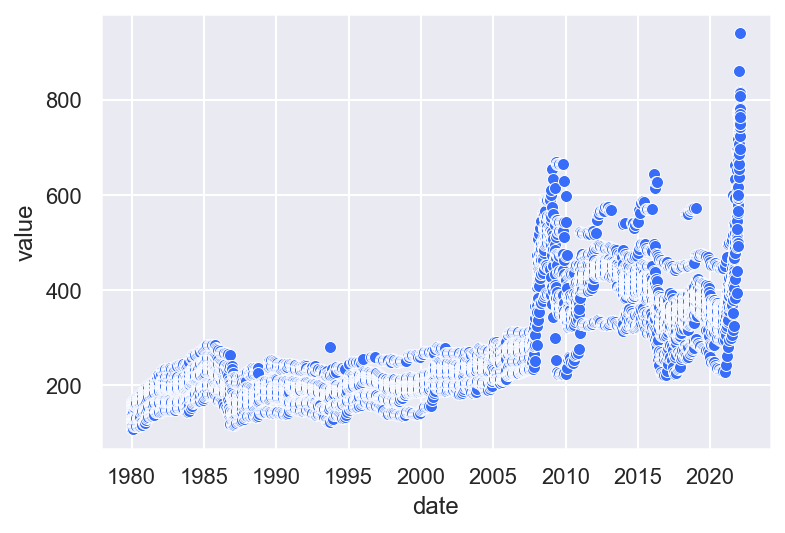

In [118]:
sns.scatterplot(df_fertiliser['date'],df_fertiliser['value']);

## Correlation
Correlation heatmaps help identify quickly if there is a relationship between values. 

In [119]:
df_fertiliser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   statistic        12144 non-null  object        
 1   date             12144 non-null  datetime64[ns]
 2   fertiliser_type  12144 non-null  category      
 3   unit             12144 non-null  object        
 4   value            6557 non-null   float64       
 5   month_year       12144 non-null  period[M]     
 6   month            12144 non-null  int64         
 7   year             12144 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(2), period[M](1)
memory usage: 676.8+ KB


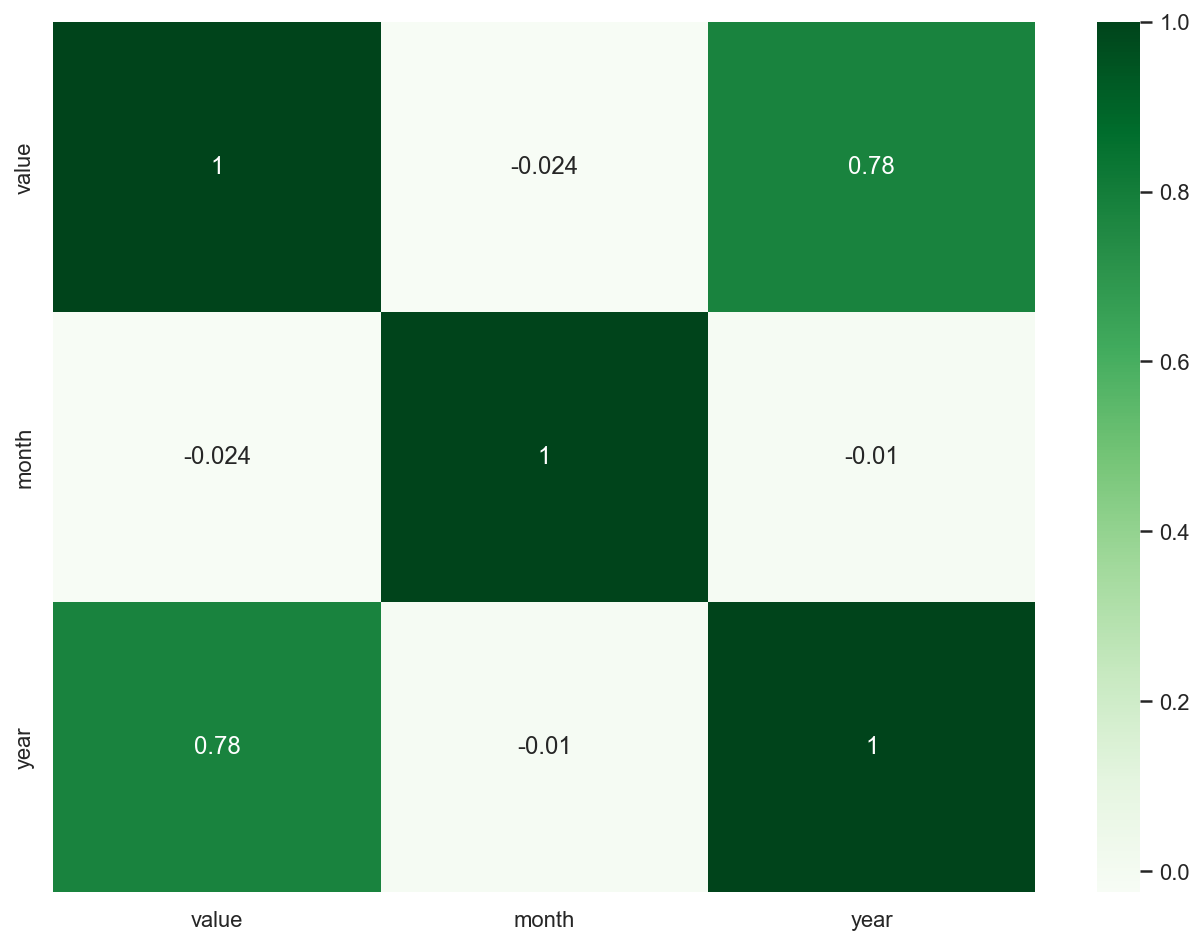

In [120]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

corr = df_fertiliser.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True);
plt.show();

## Split into test and train dataset

In [121]:
df_fertiliser

,statistic,date,fertiliser_type,unit,value,month_year,month,year
0,Fertiliser Price,1980-01-01,Calcium Ammonium Nitrate (27.5% N),Euro per Tonne,121.0,1980-01,1,1980
1,Fertiliser Price,1980-01-01,Urea (46% N),Euro per Tonne,144.0,1980-01,1,1980
2,Fertiliser Price,1980-01-01,Granular Superphosphate (16% P),Euro per Tonne,160.0,1980-01,1,1980
3,Fertiliser Price,1980-01-01,Muriate of Potash (50% K),Euro per Tonne,109.0,1980-01,1,1980
4,Fertiliser Price,1980-01-01,Compound 0-10-20,Euro per Tonne,130.0,1980-01,1,1980
...,...,...,...,...,...,...,...,...
12139,Fertiliser Price,2022-02-01,Compound 15-3-20,Euro per Tonne,770.0,2022-02,2,2022
12140,Fertiliser Price,2022-02-01,Compound 24-2.2-10,Euro per Tonne,NaN,2022-02,2,2022
12141,Fertiliser Price,2022-02-01,Compound 24-2.2-4.5,Euro per Tonne,748.0,2022-02,2,2022
12142,Fertiliser Price,2022-02-01,Compound 19-0-15,Euro per Tonne,750.0,2022-02,2,2022


In [122]:
X= df_fertiliser.drop(['value', 'statistic', 'unit'], axis=1) # feature matrix 
y = df_fertiliser['value']

In [123]:
from sklearn.model_selection import train_test_split # Import train_test_split function [2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # 67% training and 33% test // found out by 1 - test_size = 1 - 0.33 = 0.67 -> 67%
X_train.shape, X_test.shape

((8136, 5), (4008, 5))

In [124]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['date', 
                                  'fertiliser_type', 
                                  'month_year', 
                                  'month', 
                                  'year'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)


In [125]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
import warnings
import matplotlib.pyplot as plt
y = df_fertiliser['value']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('VALUE')
ax.legend();

In [127]:
### Univariate Forecast

### ARIMA

In [128]:
# split data into train-test set
train = df_fertiliser[df_fertiliser['year'] < 2010]
test = df_fertiliser[df_fertiliser['year'] >= 2010]

# check shape
train.shape, test.shape
train

((8640, 8), (3504, 8))

,statistic,date,fertiliser_type,unit,value,month_year,month,year
0,Fertiliser Price,1980-01-01,Calcium Ammonium Nitrate (27.5% N),Euro per Tonne,121.0,1980-01,1,1980
1,Fertiliser Price,1980-01-01,Urea (46% N),Euro per Tonne,144.0,1980-01,1,1980
2,Fertiliser Price,1980-01-01,Granular Superphosphate (16% P),Euro per Tonne,160.0,1980-01,1,1980
3,Fertiliser Price,1980-01-01,Muriate of Potash (50% K),Euro per Tonne,109.0,1980-01,1,1980
4,Fertiliser Price,1980-01-01,Compound 0-10-20,Euro per Tonne,130.0,1980-01,1,1980
...,...,...,...,...,...,...,...,...
8635,Fertiliser Price,2009-12-01,Compound 15-3-20,Euro per Tonne,NaN,2009-12,12,2009
8636,Fertiliser Price,2009-12-01,Compound 24-2.2-10,Euro per Tonne,NaN,2009-12,12,2009
8637,Fertiliser Price,2009-12-01,Compound 24-2.2-4.5,Euro per Tonne,NaN,2009-12,12,2009
8638,Fertiliser Price,2009-12-01,Compound 19-0-15,Euro per Tonne,NaN,2009-12,12,2009


### Automation
pip install pycaret
PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.
https://pycaret.org/

In [129]:
# import the regression module
import pycaret
from pycaret.regression import *

# initialize setup
s = setup(data = train, test_data = test, target = 'value', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

ModuleNotFoundError: No module named 'pycaret'

### Clustering 

In [130]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# taking columns IN and OUT
x = df_fertiliser['value', 'month', 'year']

kmeans = KMeans(4)
kmeans.fit(x)

KeyError: ('value', 'month', 'year')